In [2]:
import torch
import pandas as pd
import numpy as np
# import sys
# sys.path.append("/usr/WS1/jones289/hd-cuda-master")
# import matplotlib
# import matplotlib.font_manager
# matplotlib.font_manager._rebuild()
import matplotlib.pyplot as plt
from matplotlib import rc
# from deepchem.molnet import load_hiv, load_tox21, load_bace_classification, load_sider, load_clintox, load_bbbp
from sklearn.metrics import roc_curve
from hdpy.metrics import compute_roc_enrichment
import seaborn as sns
sns.set_style("whitegrid")

import os

# Change LaTeX engine if needed
# os.environ["PATH"] += os.pathsep + "/usr/bin/latex"

# os.environ["PATH"] += os.pathsep + "/usr/tce/backend/installations/linux-rhel8-x86_64/gcc-10.3.1/texlive-20220321-5dvbmoj4mr7bmfyzzzstanspbcoex6ij/bin"

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=17)
plt.rc('figure', titlesize=20)

# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from pathlib import Path

RANDOM_SEED=5
# RANDOM_SEED=99
# RANDOM_SEED=101
# RANDOM_SEED=109
output_result_dir = Path(f"/p/vast1/jones289/hd_results/{RANDOM_SEED}")

green_color_pal = sns.color_palette("Greens", 10)
blue_color_pal = sns.color_palette("Blues", 10)
red_color_pal = sns.color_palette("Reds", 10)
purple_color_pal = sns.color_palette("Purples", 10)
rocket_color_pal = sns.color_palette("rocket", 10)

# plot_dict = {
#         "RPFP": ("HDB-RPFP", red_color_pal[4]),
#         "Combo": ("HDB-Combo", purple_color_pal[5]),
#         #   "HDBind (10k) (GPU-no encode)": green_color_pal[8],
#         "MoLFormer": ("HDB-MoLFormer", green_color_pal[7]),
#         # "MoLFormer+RPFP": ("HDB Combo", green_color_pal[9]),
#         "MolCLR": ("HDB-MolCLR", green_color_pal[4]),
#         "DECFP-4": ("HDB-DECFP", red_color_pal[8]),
#         "DECFP-4-Tani": ("HDB-DECFP-Tani", blue_color_pal[4]),
#         "MLP": ("MLP", "black"),
#     }


d_to_idx_map = {"1k": 1000,
                "10k": 10000,
                "100k": 100000,
                "1m": 1000000,
                "20k": 20000,
                "50k": 50000,
                "200k": 200000,
                "500k": 500000,
                "16384": 16384}

# define the values of D instead so I don't have to enumerate this extensively...
# d_list = [1000, 10000, 100000, 1000000, 16384, 20000, 50000, 200000, 500000]
# model_name_map = {
'''

'''
model_name_map ={
    "logreg-1024-1": ("Log. Reg. (L2)", 1024),
    "logreg-1024-2": ("Log. Reg. (L2)", 1024),
    "logreg-1024-4": ("Log. Reg. (L2)", 1024),
    "logreg-2048-1": ("Log. Reg. (L2)", 2048),
    "logreg-2048-2": ("Log. Reg. (L2)", 2048),
    "logreg-2048-4": ("Log. Reg. (L2)", 2048),
    "mlp-1024-1": ("MLP-1024", 1024),
    # "mlp-2048-1": ("MLP-2048", 2048),
    "hdbind-rp-molformer-1k": ("HDB-MoLFormer", 1000),
    "hdbind-rp-molformer": ("HDB-MoLFormer", 10000),
    "hdbind-rp-molformer-100k": ("HDB-MoLFormer", 100000),
    "hdbind-rp-molformer-1m": ("HDB-MoLFormer", 1000000),
    "hdbind-rp-molformer-20k": ("HDB-MoLFormer", 20000),
    "hdbind-rp-molformer-50k": ("HDB-MoLFormer", 50000),
    "hdbind-rp-molformer-200k": ("HDB-MoLFormer", 200000),
    "hdbind-rp-molformer-500k": ("HDB-MoLFormer", 500000),

    # "hdbind-directecfp-tanimoto-16384-1": ("HDB-DECFP-Tani", 16384),
    "hdbind-directecfp-16384-1": ("HDB-DECFP", 16384),

    "hdbind-directecfp-16384-2": ("HDB-DECFP", 16384),
    "hdbind-directecfp-16384-4": ("HDB-DECFP", 16384),
    "hdbind-molformer-decfp-combo-1k": ("HDB-Combo", 1000),
    "hdbind-molformer-decfp-combo-100k": ("HDB-Combo", 100000),
    "hdbind-molformer-decfp-combo-1m": ("HDB-Combo", 1000000),
    "hdbind-molformer-decfp-combo": ("HDB-Combo", 10000),
    "hdbind-molformer-decfp-combo-20k": ("HDB-Combo", 20000),
    "hdbind-molformer-decfp-combo-50k": ("HDB-Combo", 50000),
    "hdbind-molformer-decfp-combo-200k": ("HDB-Combo", 200000),
    "hdbind-molformer-decfp-combo-500k": ("HDB-Combo", 500000),
    "hdbind-rp-ecfp-1024-1-1k": ("HDB-RPFP", 1000),
    "hdbind-rp-ecfp-1024-1": ("HDB-RPFP", 10000),
    "hdbind-rp-ecfp-1024-1-100k": ("HDB-RPFP", 100000),
    "hdbind-rp-ecfp-1024-1-1m": ("HDB-RPFP", 1000000),
    "hdbind-rp-ecfp-1024-1-20k": ("HDB-RPFP", 20000),
    "hdbind-rp-ecfp-1024-1-50k": ("HDB-RPFP", 50000),
    "hdbind-rp-ecfp-1024-1-200k": ("HDB-RPFP", 200000),
    "hdbind-rp-ecfp-1024-1-500k": ("HDB-RPFP", 500000),
    "hdbind-rp-molclr-1k": ("HDB-MolCLR", 1000),
    "hdbind-rp-molclr": ("HDB-MolCLR", 10000),
    "hdbind-rp-molclr-100k": ("HDB-MolCLR", 100000),
    "hdbind-rp-molclr-1m": ("HDB-MolCLR", 1000000),
    "hdbind-rp-molclr-20k": ("HDB-MolCLR", 20000),
    "hdbind-rp-molclr-50k": ("HDB-MolCLR", 50000),
    "hdbind-rp-molclr-200k": ("HDB-MolCLR", 200000),
    "hdbind-rp-molclr-500k": ("HDB-MolCLR", 500000),
    "hdbind-directecfp-1k-1": ("HDB-DECFP", 1000),
    "hdbind-directecfp-1k-2": ("HDB-DECFP", 1000),
    "hdbind-directecfp-1k-4": ("HDB-DECFP", 1000),
    "hdbind-directecfp-10k-1": ("HDB-DECFP", 10000),
    "hdbind-directecfp-10k-2": ("HDB-DECFP", 10000),
    "hdbind-directecfp-10k-4": ("HDB-DECFP", 10000),
    "hdbind-directecfp-100k-1": ("HDB-DECFP", 100000),
    "hdbind-directecfp-100k-2": ("HDB-DECFP", 100000),
    "hdbind-directecfp-100k-4": ("HDB-DECFP", 100000),
    "hdbind-directecfp-1m-1": ("HDB-DECFP", 1000000),
    "hdbind-directecfp-1m-2": ("HDB-DECFP", 1000000),
    "hdbind-directecfp-1m-4": ("HDB-DECFP", 1000000),
    "hdbind-directecfp-20k-1": ("HDB-DECFP", 20000),
    "hdbind-directecfp-20k-2": ("HDB-DECFP", 20000),
    "hdbind-directecfp-20k-4": ("HDB-DECFP", 20000),
    "hdbind-directecfp-50k-1": ("HDB-DECFP", 50000),
    "hdbind-directecfp-50k-2": ("HDB-DECFP", 50000),
    "hdbind-directecfp-50k-4": ("HDB-DECFP", 50000),
    "hdbind-directecfp-200k-1": ("HDB-DECFP", 200000),
    "hdbind-directecfp-200k-2": ("HDB-DECFP", 200000),
    "hdbind-directecfp-200k-4": ("HDB-DECFP", 200000),
    "hdbind-directecfp-500k-1": ("HDB-DECFP", 500000),
    "hdbind-directecfp-500k-2": ("HDB-DECFP", 500000),
    "hdbind-directecfp-500k-4": ("HDB-DECFP", 500000),
}
'''


'''
# }





'\n\n\n'

In [3]:
def collect_metrics(dataset:str, split:str, config_list:list, verbose=False, use_time=False, use_roc_curve=False):

    result_dict = {
                    "model": [],
                    "D": [],
                    "target": [],
                    "seed": [],
                    "roc-auc": [],
                    # "er-1": [],
                    "er-0.1": [],
                    "er-0.2": [],
                    "er-0.5": [],
                    "er-1.0": [],
                    "er-2.0": [],
                    "er-5.0": [],
                    "path": []}
    
    if use_time:
                    
        result_dict["train_time_cpu_sum"] = []
        result_dict["train_time_cpu_norm"] = []
        result_dict["train_time_cuda_sum"] = []
        result_dict["train_time_cuda_norm"] = []
        result_dict["test_time_cpu_sum"] = []
        result_dict["test_time_cpu_norm"] = []
        result_dict["test_time_cuda_sum"] = []
        result_dict["test_time_cuda_norm"] = []

    if use_roc_curve:
        result_dict["roc-curve"] = []


    target_list = []
    if dataset in ["bbbp", "tox21", "clintox", "hiv", "bace", "sider"]:
        if dataset == "bbbp":
            # data = load_bbbp()
            target_list = ['p_np']
        if dataset == "tox21":
            # data = load_tox21()
            target_list = ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']
        if dataset == "clintox":
            # data = load_clintox(splitter="scaffold")
            target_list = ['FDA_APPROVED', 'CT_TOX']
        if dataset == "hiv":
            # data = load_hiv()
            target_list = ['HIV_active']
        if dataset == "bace":
            # data = load_bace_classification()
            target_list = ['Class']
        if dataset == "sider":
            # data = load_sider()
            target_list = ['Hepatobiliary disorders', 'Metabolism and nutrition disorders', 'Product issues', 'Eye disorders', 'Investigations', 'Musculoskeletal and connective tissue disorders', 'Gastrointestinal disorders', 'Social circumstances', 'Immune system disorders', 'Reproductive system and breast disorders', 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)', 'General disorders and administration site conditions', 'Endocrine disorders', 'Surgical and medical procedures', 'Vascular disorders', 'Blood and lymphatic system disorders', 'Skin and subcutaneous tissue disorders', 'Congenital, familial and genetic disorders', 'Infections and infestations', 'Respiratory, thoracic and mediastinal disorders', 'Psychiatric disorders', 'Renal and urinary disorders', 'Pregnancy, puerperium and perinatal conditions', 'Ear and labyrinth disorders', 'Cardiac disorders', 'Nervous system disorders', 'Injury, poisoning and procedural complications']

        # target_list = data[0]
    elif dataset == "lit-pcba":
        lit_pcba_ave_p = Path("/p/vast1/jones289/lit_pcba/AVE_unbiased")
        target_list = [x.name for x in list(lit_pcba_ave_p.glob("*/"))]

    # print(target_list)
    for config_path in tqdm(config_list):
        exp_name = config_path.stem
        if verbose:
            print(f"{config_path}, {exp_name}")

        # '''
         # '''
        # for d in range(10):       
        if exp_name.split(".")[0] in model_name_map:
            
            for target_name in target_list:
                
                result_file = Path(
                    f"{output_result_dir}/{exp_name}.{dataset}-{target_name.replace(' ','_')}-{split}.{RANDOM_SEED}.pkl"
                )
                print(result_file)
                try:
                    if verbose:
                        print(f"loading {result_file}")
                    data = torch.load(result_file)
                except FileNotFoundError as e:
                    print(f"{e}. {result_file} does not exist.")
                    continue


                # print(data.keys())
                for random_state in data["trials"].keys():

                    result_dict["path"].append(result_file)
                    result_dict["model"].append(model_name_map[exp_name][0])
                    # result_dict["D"].append(data["args"].D)
                    result_dict["D"].append(model_name_map[exp_name][1])
                    result_dict["target"].append(target_name)
                    result_dict["seed"].append(random_state)
                    result_dict["roc-auc"].append(data["trials"][random_state]["roc-auc"])






                    if use_time:
                        # extract timing information
                        if "mlp" in model_name_map[exp_name][0].lower():
                    
                            train_time_cpu_sum = 0.0
                            for time_key in ["train_forward_time_cpu_sum", "train_loss_time_cpu_sum", "train_backward_time_cpu_sum"]:
                                train_time_cpu_sum += data["trials"][random_state][time_key] 

                            result_dict["train_time_cpu_sum"].append(train_time_cpu_sum)


                            train_time_cpu_norm = 0.0
                            for time_key in ["train_forward_time_cpu_norm", "train_loss_time_cpu_norm", "train_backward_time_cpu_norm"]:
                                train_time_cpu_norm += data["trials"][random_state][time_key]

                            result_dict["train_time_cpu_norm"].append(train_time_cpu_norm)


                            train_time_cuda_sum = 0.0
                            for time_key in ["train_forward_time_cuda_sum", "train_loss_time_cuda_sum", "train_backward_time_cuda_sum"]:
                                train_time_cuda_sum += data["trials"][random_state][time_key]

                            result_dict["train_time_cuda_sum"].append(train_time_cuda_sum)


                            train_time_cuda_norm = 0.0
                            for time_key in ["train_forward_time_cuda_norm", "train_loss_time_cuda_norm", "train_backward_time_cuda_norm"]:
                                train_time_cuda_norm += data["trials"][random_state][time_key]

                            result_dict["train_time_cuda_norm"].append(train_time_cuda_norm)

                            # add testing information


                            result_dict["test_time_cpu_sum"].append(data["trials"][random_state]["test_forward_time_cpu_sum"])
                            result_dict["test_time_cpu_norm"].append(data["trials"][random_state]["test_forward_time_cpu_norm"])
                            result_dict["test_time_cuda_sum"].append(data["trials"][random_state]["test_forward_time_cuda_sum"])
                            result_dict["test_time_cuda_norm"].append(data["trials"][random_state]["test_forward_time_cuda_norm"])

                        elif "logreg" in exp_name.lower():

                            result_dict["train_time_cpu_sum"].append(np.nan)
                            result_dict["train_time_cpu_norm"].append(np.nan)
                            result_dict["train_time_cuda_sum"].append(np.nan)
                            result_dict["train_time_cuda_norm"].append(np.nan)


                            result_dict["test_time_cpu_sum"].append(np.nan)
                            result_dict["test_time_cpu_norm"].append(np.nan)
                            result_dict["test_time_cuda_sum"].append(np.nan)
                            result_dict["test_time_cuda_norm"].append(np.nan)


                        else:

                            train_time_cpu_sum = 0.0
                            for time_key in ["am_time_cpu_sum", "retrain_time_cpu_sum"]:
                                train_time_cpu_sum += data["trials"][random_state][time_key] 
                            result_dict["train_time_cpu_sum"].append(train_time_cpu_sum)


                            train_time_cpu_norm = 0.0
                            for time_key in ["am_time_cpu_norm", "retrain_time_cpu_norm"]:
                                train_time_cpu_norm += data["trials"][random_state][time_key]
                            result_dict["train_time_cpu_norm"].append(train_time_cpu_norm)


                            train_time_cuda_sum = 0.0
                            for time_key in ["am_time_cuda_sum", "retrain_time_cuda_sum"]:
                                train_time_cuda_sum += data["trials"][random_state][time_key] 
                            result_dict["train_time_cuda_sum"].append(train_time_cuda_sum)


                            train_time_cuda_norm = 0.0
                            for time_key in ["am_time_cuda_norm", "retrain_time_cuda_norm"]:
                                train_time_cuda_norm += data["trials"][random_state][time_key]
                            result_dict["train_time_cuda_norm"].append(train_time_cuda_norm)


                            result_dict["test_time_cpu_sum"].append(data["trials"][random_state]["test_time_cpu_sum"])
                            result_dict["test_time_cuda_sum"].append(data["trials"][random_state]["test_time_cuda_sum"])

                            result_dict["test_time_cpu_norm"].append(data["trials"][random_state]["test_time_cpu_norm"])
                            result_dict["test_time_cuda_norm"].append(data["trials"][random_state]["test_time_cuda_norm"])



                    # add roc enrichment metrics
                    # for trial_idx in data["trials"].keys():
                    scores = None 

                    if "mlp" in exp_name.lower():
                        scores = data["trials"][random_state]["eta"][:, 1]
                    else:

                        scores = data["trials"][random_state]["eta"]
                    
                    labels = data["trials"][random_state]['y_true']


                    for fpr_thresh in [1/1000, 2/1000, 5/1000, 1/100, 2/100, 5/100]:

                        trial_er = compute_roc_enrichment(scores=scores, labels=labels, fpr_thresh=fpr_thresh)

                        er_key = f"er-{np.round(fpr_thresh * 100,2)}"

                        result_dict[er_key].append(trial_er)


                    if use_roc_curve:
                        result_dict['roc-curve'].append(roc_curve(y_true=labels, y_score=scores))                    


    # import pdb
    # pdb.set_trace()
    return pd.DataFrame(result_dict)

In [4]:
def get_metric_df(dataset:str, config_list: list, split:str, use_cache=True, verbose=False, use_time=False, use_roc_curve=False):
    if dataset == "lit-pcba":
        assert split in ["ave", "random"]
    else:
        print("using molnet dataset, scaffold split")

    metric_df = None
    metric_df_path = Path(f"scirep_plot_backup/{dataset}-{split}-{RANDOM_SEED}-metric-df.csv")

    if use_cache:

        if not metric_df_path.exists():
            metric_df_path.parent.mkdir(parents=True, exist_ok=True)

            metric_df = collect_metrics(dataset=dataset, split=split, 
                                            config_list=config_list,
                                            verbose=verbose, use_time=use_time, use_roc_curve=use_roc_curve)
            metric_df.to_csv(metric_df_path)

        else:
            metric_df = pd.read_csv(metric_df_path, index_col=0)
    else:
        metric_df = collect_metrics(dataset=dataset, split=split, 
                                    config_list=config_list,
                                        verbose=verbose, use_time=use_time, use_roc_curve=use_roc_curve)
        metric_df.to_csv(metric_df_path)   
    
    return metric_df


In [5]:
# config_dir = "configs"
# bbbp_metric_df = get_metric_df(
#                                 dataset="bbbp",
#                                 config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
#                                 split="scaffold", 
#                                 use_cache=False,
#                                 verbose=True,
#                                 use_time=False,
#                                 use_roc_curve=True)
# bbbp_metric_df

In [6]:
# config_dir = "roc_auc_configs_final"
# config_dir = "roc_auc_configs_revise"
config_dir = "configs"
ave_metric_df = get_metric_df(config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
                                split="ave", 
                                use_cache=True,
                                verbose=True,
                                use_time=False)
ave_metric_df

TypeError: get_metric_df() missing 1 required positional argument: 'dataset'

In [5]:
ave_metric_df["D"].unique()

array([   1000,   10000,    1024,   20000,   50000,  100000, 1000000,
         16384,  200000,  500000])

In [6]:
ave_metric_df.columns

Index(['model', 'D', 'target', 'seed', 'roc-auc', 'er-0.1', 'er-0.2', 'er-0.5',
       'er-1.0', 'er-2.0', 'er-5.0', 'path'],
      dtype='object')

In [7]:
random_metric_df = get_metric_df(config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
                                    split="random", 
                                    use_cache=True,
                                    verbose=True,
                                    use_time=False
                                )
random_metric_df

model      D target  seed   roc-auc     er-0.1     er-0.2  \
0          HDB-RPFP   1000  ADRB2     0  0.757021   0.000000  25.000000   
1          HDB-RPFP   1000  ADRB2     1  0.811605   0.000000   0.000000   
2          HDB-RPFP   1000  ADRB2     2  0.714704   0.000000   0.000000   
3          HDB-RPFP   1000  ADRB2     3  0.672732   0.000000   0.000000   
4          HDB-RPFP   1000  ADRB2     4  0.677708   0.000000  25.000000   
...             ...    ...    ...   ...       ...        ...        ...   
8395  HDB-MoLFormer  50000    VDR     5  0.929298  31.927711  34.337349   
8396  HDB-MoLFormer  50000    VDR     6  0.929684  31.325301  33.897590   
8397  HDB-MoLFormer  50000    VDR     7  0.929382  32.530120  33.132530   
8398  HDB-MoLFormer  50000    VDR     8  0.929403  31.927711  33.734940   
8399  HDB-MoLFormer  50000    VDR     9  0.930789  31.325301  34.337349   

         er-0.5     er-1.0     er-2.0     er-5.0  \
0     25.000000  25.000000  25.000000  25.000000   
1      0.000000  25.000000  25.000000  25.000000   
2      0.000000  25.000000  25.000000  25.000000   
3     25.000000  25.000000  25.000000  25.000000   
4     25.000000  25.000000  25.000000  25.000000   
...         ...        ...        ...        ...   
8395  46.385542  53.614458  62.650602  70.481928   
8396  45.783133  54.216867  63.253012  71.084337   
8397  45.783133  54.819277  61.445783  71.084337   
8398  45.783133  56.024096  60.240964  71.084337   
8399  46.987952  56.024096  60.240964  70.481928   

                                                   path  
0     /p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-...  
1     /p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-...  
2     /p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-...  
3     /p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-...  
4     /p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-...  
...                                                 ...  
8395  /p/vast1/jones289/hd_results/5/hdbind-rp-molfo...  
8396  /p/vast1/jones289/hd_results/5/hdbind-rp-molfo...  
8397  /p/vast1/jones289/hd_results/5/hdbind-rp-molfo...  
8398  /p/vast1/jones289/hd_results/5/hdbind-rp-molfo...  
8399  /p/vast1/jones289/hd_results/5/hdbind-rp-molfo...  

[8400 rows x 12 columns]

In [23]:
ave_metric_df.loc[:, "path"][0]

'/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.lit-pcba-ADRB2-ave.5.pkl'

In [24]:
ave_metric_df.groupby(["model", "D"]).describe()

seed                                         roc-auc  \
                       count mean       std  min  25%  50%  75%  max   count   
model         D                                                                
HDB-Combo     1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
HDB-DECFP     1000     450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              10000    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              16384    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              20000    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              50000    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              100000   450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              200000   450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              500000   450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              1000000  450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
HDB-MoLFormer 1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              20000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              50000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              200000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              500000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
HDB-MolCLR    1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              20000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              50000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              200000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              500000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
HDB-RPFP      1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              20000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              50000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              200000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              500000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
MLP-1024      1024     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   

                                 ...     er-2.0             er-5.0             \
                           mean  ...        75%         max  count       mean   
model         D                  ...                                            
HDB-Combo     1000     0.610223  ...   8.000000   23.913043  150.0  10.129025   
              10000    0.694975  ...  12.500000   33.333333  150.0  20.007178   
              100000   0.757579  ...  72.027386  100.000000  150.0  40.384849   
              1000000  0.721515  ...  36.000000  100.000000  150.0  30.799237   
HDB-DECFP     1000     0.619744  ...  14.848485   33.333333  450.0  16.320216   
              10000    0.660812  ...  15.789474   48.913043  450.0  17.882070   
              

In [25]:
random_metric_df.groupby(["model", "D"]).describe()

seed                                         roc-auc  \
                       count mean       std  min  25%  50%  75%  max   count   
model         D                                                                
HDB-Combo     1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
HDB-DECFP     1000     450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              10000    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              16384    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              20000    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              50000    450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              100000   450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              200000   450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              500000   450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
              1000000  450.0  4.5  2.875478  0.0  2.0  4.5  7.0  9.0   450.0   
HDB-MoLFormer 1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              20000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              50000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              200000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              500000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
HDB-MolCLR    1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              20000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              50000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              200000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              500000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
HDB-RPFP      1000     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              10000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              20000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              50000    150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              100000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              200000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              500000   150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
              1000000  150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   
MLP-1024      1024     150.0  4.5  2.881904  0.0  2.0  4.5  7.0  9.0   150.0   

                                 ...     er-2.0             er-5.0             \
                           mean  ...        75%         max  count       mean   
model         D                  ...                                            
HDB-Combo     1000     0.731804  ...  30.952381   66.666667  150.0  32.390653   
              10000    0.829251  ...  57.142857   83.333333  150.0  50.421562   
              100000   0.825901  ...  54.278600   83.333333  150.0  50.831107   
              1000000  0.718221  ...  27.301060   83.333333  150.0  30.521869   
HDB-DECFP     1000     0.754243  ...  42.857143  100.000000  450.0  40.068975   
              10000    0.786320  ...  47.619048   83.333333  450.0  42.305092   
              

In [26]:
random_metric_df.to_csv("debug.csv")

In [65]:
green_color_pal

[(0.9176931949250289, 0.9684275278738947, 0.901361014994233),
 (0.8459054209919262, 0.9399307958477509, 0.8228219915417148),
 (0.7558477508650518, 0.9033910034602076, 0.7290426758938869),
 (0.6436447520184544, 0.8561476355247981, 0.6197923875432525),
 (0.5185697808535179, 0.7983391003460207, 0.5150941945405614),
 (0.3827450980392157, 0.7332564398308343, 0.42737408688965783),
 (0.2452133794694348, 0.6602537485582468, 0.35695501730103807),
 (0.1566320645905421, 0.5657670126874279, 0.28608996539792386),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.0, 0.38268358323721646, 0.15398692810457515)]

In [66]:
red_color_pal

[(0.9971703191080353, 0.901361014994233, 0.8562860438292964),
 (0.9926028450595925, 0.8141330257593233, 0.7383775470972702),
 (0.9882352941176471, 0.7068512110726644, 0.6010149942329873),
 (0.9882352941176471, 0.5857900807381776, 0.46223760092272204),
 (0.9857285659361784, 0.4722798923490965, 0.34678969627066514),
 (0.9673356401384082, 0.34918877354863515, 0.24775086505190314),
 (0.9256286043829296, 0.22006920415224915, 0.1677047289504037),
 (0.8193310265282583, 0.11672433679354094, 0.12341407151095732),
 (0.7130949634755863, 0.0744636678200692, 0.0962552864282968),
 (0.579361783929258, 0.04244521337946944, 0.07361783929257976)]

In [67]:
rocket_color_pal

[(0.13501631, 0.07585609, 0.19044109),
 (0.26930915, 0.1091727, 0.2772502),
 (0.41282936, 0.12164769, 0.33467689),
 (0.57077365, 0.11135597, 0.35827146),
 (0.72398193, 0.08688725, 0.33943958),
 (0.85281737, 0.15657772, 0.27909826),
 (0.93078135, 0.31373977, 0.24468803),
 (0.95626788, 0.49187351, 0.33985601),
 (0.96388426, 0.64484214, 0.4861196),
 (0.96810471, 0.78634563, 0.66773889)]

In [68]:
blue_color_pal

[(0.8978854286812764, 0.939038831218762, 0.977362552864283),
 (0.828881199538639, 0.8937639369473279, 0.954725105728566),
 (0.7506343713956171, 0.8478431372549019, 0.9282122260668974),
 (0.6325259515570935, 0.7976470588235294, 0.8868742791234141),
 (0.491764705882353, 0.7219684736639754, 0.8547789311803152),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.24816608996539793, 0.5618915801614763, 0.7709803921568628),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.03137254901960784, 0.28161476355247983, 0.5582622068435218)]

In [69]:
purple_color_pal

[(0.951449442522107, 0.9446981930026913, 0.969519415609381),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.8355247981545559, 0.8361707035755478, 0.9118800461361014),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.4948558246828143, 0.47598615916955017, 0.7219838523644752),
 (0.4298961937716263, 0.3460668973471741, 0.6540715109573241),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.30648212226066895, 0.11035755478662054, 0.5411303344867359)]

In [7]:
model_color_dict = {
    "MoleHD-BPE": rocket_color_pal[4],
    "HDB-RPFP": green_color_pal[0],
    "HDB-DECFP": green_color_pal[3],
    "HDB-DECFP-Tani": blue_color_pal[3],
    "HDB-MolCLR": green_color_pal[5],
    "HDB-MoLFormer": green_color_pal[7],
    "HDB-Combo": green_color_pal[9],
    # "MLP-1024": blue_color_pal[7],
    "MLP-1024": red_color_pal[7],
    "Log. Reg. (L2)": red_color_pal[9],
    # "Vina": ("Vina", "salmon"),
}

roc_model_color_dict = {
    "MoleHD-BPE": rocket_color_pal[4], 
    "HDB-RPFP": purple_color_pal[6],
    "HDB-DECFP": blue_color_pal[4],
    "HDB-DECFP-Tani": blue_color_pal[9],
    "HDB-MolCLR": rocket_color_pal[5],
    "HDB-MoLFormer": green_color_pal[4],
    "HDB-Combo": green_color_pal[9],
    # "MLP-1024": blue_color_pal[7],
    "MLP-1024": red_color_pal[4],
    "Log. Reg. (L2)": red_color_pal[9],
    # "Vina": ("Vina", "salmon"),
}


model_order_dict = {
    "HDB-RPFP": 0,
    "HDB-DECFP": 1,
    "HDB-DECFP-Tani":2,
    "HDB-MolCLR": 3,
    "HDB-MoLFormer": 4,
    "HDB-Combo": 5,
    "MLP-1024": 6,
    "Log. Reg. (L2)": 7,
    # "HDB-MolCLR": 2,
    # "HDB-MoLFormer": 3,
    # "HDB-Combo": 4,
    # "MLP-1024": 5,
    }



def make_plot(df, ax, metric):
    # print(df.head())
    df = df.sort_values(by='model', key=lambda x: x.map(model_order_dict))

    width=0.8
    gap=0.2

    sns.boxenplot(data=df, 
            x="D", y=metric, 
            hue="model", 
            ax=ax,
            # order=model_order_list,
            palette={x: model_color_dict[x] for x in model_color_dict.keys()},
            width=width, 
            gap=gap
            )
    
def make_roc_auc_plot():

    mlp_1024_mean_rocauc_random = (random_metric_df[random_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"])["roc-auc"].mean().values

    mlp_1024_mean_rocauc_ave = (ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"])["roc-auc"].mean().values



    f,ax = plt.subplots(2,1, figsize=(16,20), sharex=True, sharey=True)

    alpha=0.7

    make_plot(df=random_metric_df[random_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
          ax=ax[0], metric="roc-auc")

    make_plot(df=ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
          ax=ax[1], metric="roc-auc")
    ax[0].set_ylabel("ROC-AUC")
    ax[1].set_ylabel("")

    ax[0].set_title("Random", fontsize=18)
    ax[1].set_title("AVE", fontsize=18)


    # ax[0].get_legend().remove()

    handles, labels = ax[1].get_legend_handles_labels()
    # handles.append(ax[1].axhline(mlp_1024_mean_rocauc_ave, color="red", linestyle="--", alpha=alpha))
    # labels.append("MLP ($\mu$)")
    ax[1].legend(handles,labels, fontsize="x-large", loc="best")
    ax[0].set_xlabel("HDC Dimension $D$", fontsize=20)
    ax[1].set_xlabel("HDC Dimension $D$", fontsize=20)

    hline_zorder=None
    best_model_score_random = random_metric_df[random_metric_df["model"].apply(lambda x: "mlp" not in x.lower() and "log" not in x.lower())].groupby(["model", "D"])["roc-auc"].median().max()
    best_model_score_ave = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower() and "log" not in x.lower())].groupby(["model", "D"])["roc-auc"].median().max()
    print(best_model_score_random, best_model_score_ave)

    handles,labels = ax[0].get_legend_handles_labels()
    handles.append(ax[0].axhline(y=best_model_score_random, color="blue", linestyle="--",zorder=hline_zorder))
    labels.append("Best HDBind (Median)")
    handles.append(ax[0].axhline(mlp_1024_mean_rocauc_random, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP ($\mu$)")
    handles.append(ax[0].axhline(y=0.5, color="red", linestyle=":", zorder=hline_zorder))
    labels.append("Random")
    ax[0].legend(handles,labels, fontsize="x-large", loc="best")


    # ax[0].legend(handles,labels, fontsize="x-large", loc="best")


    handles,labels = ax[1].get_legend_handles_labels()
    handles.append(ax[1].axhline(y=best_model_score_ave, color="blue", linestyle="--", zorder=hline_zorder))
    labels.append("Best HDBind (Median)")
    handles.append(ax[1].axhline(mlp_1024_mean_rocauc_ave, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP ($\mu$)")
    handles.append(ax[1].axhline(y=0.5, color="red", linestyle=":", zorder=hline_zorder))
    labels.append("Random")
    ax[1].legend(handles,labels, fontsize="x-large", loc="best")

    plt.tight_layout()
    plt.savefig("lit-pcba-rocauc-boxenplot.png", dpi=450)
    
def make_er_plot(thresh=.01):

    f,ax = plt.subplots(1,1, figsize=(16,8), sharex=True, sharey=True)

    er_key = f"er-{np.round(thresh * 100, 2)}"

    mlp_1024_mean_er1_ave = (ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"])[er_key].mean().values
    print(er_key)

    make_plot(df=ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
          ax=ax, metric=er_key)
    ax.set_ylabel("")

    ax.set_title(f"{er_key.upper()}% (AVE)", fontsize=18)

    alpha=0.7
    handles, labels = ax.get_legend_handles_labels()

    if er_key.lower() == "er-1.0":
        handles.append(ax.axhline(4.78, color="red", linestyle="--", alpha=alpha))
        labels.append("GRIM ($\mu$)")
        handles.append(ax.axhline(3.46, color="darkred", linestyle="-.", alpha=alpha))
        labels.append("Pafnucy ($\mu$)")

    handles.append(ax.axhline(mlp_1024_mean_er1_ave, color="red", linestyle=":", linewidth=3, alpha=alpha))
    labels.append("MLP ($\mu$)")

    ax.legend(handles,labels, fontsize="x-large", loc="best")
    ax.set_xlabel("HDC Dimension $D$", fontsize=20)

    plt.tight_layout()
    plt.savefig(f"lit-pcba-{er_key}-{RANDOM_SEED}-boxenplot.png", dpi=450)



from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import matplotlib.colors as mcolors

def make_ttest_plot(metric="roc-auc", mult_alpha=0.05, method="simes-hochberg"):
    f,ax = plt.subplots(1,1, figsize=(9,8), sharex=True, sharey=True)


    
    heat_map_dict = {"p-value": [],
                    "model": [],
                    "D": [],
                    "index": []}

    ground_truth_df_1024 = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp-1024" in x.lower())]
    ground_truth_df_2048 = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp-2048" in x.lower())]

    # print("MLP-1024", ground_truth_df_1024)
    # print("MLP-2048", ground_truth_df_2048)
    for (model, D), group_df in ave_metric_df.groupby(["model", "D"]):
        # print(group, group_df)

        try:
            pvalue = ttest_rel(group_df[metric], ground_truth_df_1024[metric]).pvalue
            print(group_df[metric].shape, ground_truth_df_1024[metric].shape)
            # print(group, pvalue)
            heat_map_dict["model"].append(model)
            heat_map_dict["D"].append(D)
            heat_map_dict["index"].append(f"{model}-{D}")
            heat_map_dict["p-value"].append(pvalue)
        except Exception as e:
            print(e)


    print(heat_map_dict["p-value"])    
    
    heat_map_df = pd.DataFrame(heat_map_dict)
    heat_map_df = heat_map_df[heat_map_df["model"].apply(lambda x: "mlp" not in x.lower())]
    reject, p_values_correct, _, _ = multipletests(heat_map_df["p-value"], method=method, alpha=mult_alpha)


    heat_map_df["corr-p-value"] = p_values_correct
    
    # log_cmap = mcolors.LogNorm(vmin=0.05, vmax=1)
    heat_map_df = heat_map_df.pivot(index="model", columns="D", values="corr-p-value")

    # gax = sns.heatmap(heat_map_df, ax=ax, cmap="coolwarm_r",annot=True, vmin=0.05, vmax=0.05)
    gax = sns.heatmap(heat_map_df, ax=ax, cmap="coolwarm_r",annot=True, vmin=mult_alpha, vmax=mult_alpha)
    # gax = sns.heatmap(heat_map_df, ax=ax, vmin=0, vmax=0.05, cmap="coolwarm_r",annot=True)
    gax.set_ylabel("")

    metric_str_map = {"roc-auc": "ROC-AUC",
                        "er-1": "ER-1%"}
    title_str = f"Statistical significance of {metric_str_map[metric]} ({method}, $\\alpha$={mult_alpha})"
    f.suptitle(title_str)

    plt.tight_layout()

    

    out_str = f"{metric}-{method}-{mult_alpha}"
    plot_path = Path(f"stat_sig_plots/{out_str}-heatmap.png")
    if not plot_path.exists():
        plot_path.parent.mkdir(exist_ok=True)
    print(plot_path)
    plt.savefig(plot_path, dpi=450)
    plt.show()







def make_time_plot(split:str):

    mlp_1024_median_test_time_ave = (ave_metric_df[ave_metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).median()[split].values
    f, ax = plt.subplots(1,1, figsize=(16,8), sharex=True, sharey=True)

    # make_plot(df=ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
    make_plot(df=ave_metric_df,
          ax=ax, metric=f"{split}")

    ax.set_yscale("log")
    ax.set_ylabel(f"{split.capitalize()} time (s/mol)")
    ax.legend().set_title(None)

    alpha=0.7
    handles, labels = ax.get_legend_handles_labels()
    handles.append(ax.axhline(mlp_1024_median_test_time_ave, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP")

    best_model_time_ave = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())].groupby(["model", "D"])[f"{split}"].median().min()
    handles.append(ax.axhline(best_model_time_ave, color="blue", linestyle="--", alpha=alpha))
    labels.append("HDBind Best")

    ax.legend(handles,labels, fontsize="x-large", loc="best")
    ax.set_title(f"LIT-PCBA AVE {split.capitalize()} Set Latency", fontsize=18)
    plt.tight_layout()
    plt.savefig(f"lit-pcba-{split.lower()}-time-boxenplot.png", dpi=450)


In [8]:
from sklearn.metrics import RocCurveDisplay

def make_roc_curve_plot(df, title, use_seaborn=False):
    # print(df.head())
    df = df.sort_values(by='model', key=lambda x: x.map(model_order_dict))


    d_map = {
            1000: 0,
            10000: 1,
            100000: 2,
            1000000: 3,
            10000000: 4
            }


    width=0.8
    gap=0.2
    groups = df.groupby(['model', 'D', 'seed'])

    # Plotting the ROC curves for each group
    # plt.figure(figsize=(10, 7))
    f, ax_arr = plt.subplots(2,2,figsize=(22, 20))

    ax_arr = ax_arr.flatten()

    for name, group in groups:
        
        
        if "mlp" in name[0].lower():
            for i in range(4):
                ax = ax_arr[i]
                print(name)
                fpr, tpr, _ = zip(*group['roc-curve'])
                
                
                color=roc_model_color_dict[name[0]]
                # Assuming each group has only one row, access first element in fpr and tpr
                if use_seaborn:
                    raise NotImplementedError
                    # sns.lineplot(x=fpr[0], y=tpr[0], label=f"Model: {name[0]}, D: {name[1]}: {group['roc-auc']:.2f}", color=color, ci=None, ax=ax)
                else:
                    if int(name[2]) == 0:
                        ax.plot(fpr[0], tpr[0], label=f"{name[0]}", color=color)
                    else:

                        ax.plot(fpr[0], tpr[0], color=color)   
        else:

            ax = ax_arr[d_map[int(name[1])]]
            print(name)
            fpr, tpr, _ = zip(*group['roc-curve'])
            
            
            color=roc_model_color_dict[name[0]]
            # Assuming each group has only one row, access first element in fpr and tpr
            if use_seaborn:
                raise NotImplementedError
                # sns.lineplot(x=fpr[0], y=tpr[0], label=f"{name[0]}, D: {name[1]}: {group['roc-auc']:.2f}", color=color, ci=None, ax=ax)
            else:
                if int(name[2]) == 0:
                    ax.plot(fpr[0], tpr[0], label=f"{name[0]}", color=color)
                else:

                    ax.plot(fpr[0], tpr[0], color=color)

            ax.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line for random guess
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f"{title} (D={str(name[1])})", fontsize=24)
    for ax in ax_arr:
        # Plot settings

        ax.legend()
        ax.grid(True)
        plt.tight_layout()
    return f



bbbp
using molnet dataset, scaffold split


/var/tmp/jones289/ipykernel_2300675/389168472.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for config_path in tqdm(config_list):


  0%|          | 0/111 [00:00<?, ?it/s]

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/logreg-1024-1.bbbp-p_np-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.bbbp-p_np-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.bbbp-p_np-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.bbbp-p_np-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.bbbp-p_np-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.bbbp-p_np-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.bbbp-p_np-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.bbbp-p_np-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.bbbp-p_np-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/logreg-1024-2.bbbp-p_np-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-2.bbbp-p_np-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-2.bbbp-p_np-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.bbbp-p_np-scaffold.5.

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.bbbp-p_np-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.bbbp-p_np-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.bbbp-p_np-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.bbbp-p_np-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.bbbp-p_np-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-2.bbbp-p_np-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-2.bbbp-p_np-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-2.bbbp-p_np-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-4.bbbp-p_np-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-4.bbbp-p_np-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-4.bbbp-p_np-scaffold.5.pkl does not exist.
/p/vast1/jones28

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

('HDB-Combo', np.int64(1000), np.int64(0))
('HDB-Combo', np.int64(1000), np.int64(1))
('HDB-Combo', np.int64(1000), np.int64(2))
('HDB-Combo', np.int64(1000), np.int64(3))
('HDB-Combo', np.int64(1000), np.int64(4))
('HDB-Combo', np.int64(1000), np.int64(5))
('HDB-Combo', np.int64(1000), np.int64(6))
('HDB-Combo', np.int64(1000), np.int64(7))
('HDB-Combo', np.int64(1000), np.int64(8))
('HDB-Combo', np.int64(1000), np.int64(9))
('HDB-Combo', np.int64(10000), np.int64(0))
('HDB-Combo', np.int64(10000), np.int64(1))
('HDB-Combo', np.int64(10000), np.int64(2))
('HDB-Combo', np.int64(10000), np.int64(3))
('HDB-Combo', np.int64(10000), np.int64(4))
('HDB-Combo', np.int64(10000), np.int64(5))
('HDB-Combo', np.int64(10000), np.int64(6))
('HDB-Combo', np.int64(10000), np.int64(7))
('HDB-Combo', np.int64(10000), np.int64(8))
('HDB-Combo', np.int64(10000), np.int64(9))
('HDB-Combo', np.int64(100000), np.int64(0))
('HDB-Combo', np.int64(100000), np.int64(1))
('HDB-Combo', np.int64(100000), np.int64

/var/tmp/jones289/ipykernel_2300675/389168472.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for config_path in tqdm(config_list):


  0%|          | 0/111 [00:00<?, ?it/s]

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AR-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AR-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AR-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AR-LBD-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AR-LBD-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AR-LBD-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AhR-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AhR-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-AhR-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-NR-Aromatase-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.tox21-N

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-NR-AhR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-NR-ER-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-SR-ATAD5-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/mlp-1024-1.tox21-SR-p53-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AR-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AR-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AR-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AR-LBD-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AR-LBD-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AR-LBD-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AhR-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AhR-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.tox21-NR-AhR-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbin

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-NR-ER-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.tox21-SR-p53-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-NR-AhR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-SR-ATAD5-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-NR-AhR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-SR-ATAD5-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-NR-AhR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-SR-ATAD5-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-NR-AR-LBD-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-NR-Aromatase-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-SR-ARE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-SR-HSE-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-NR-AR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-NR-AhR-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-NR-ER-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-NR-PPAR-gamma-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-SR-ATAD5-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-SR-MMP-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-NR-AR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-NR-AR-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-NR-AhR-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-NR-Aromatase-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-NR-ER-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-NR-ER-LBD-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-NR-PPAR-gamma-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-SR-ARE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-SR-ATAD5-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-SR-HSE-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-SR-MMP-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.tox21-SR-p53-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AR-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AR-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AR-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AR-LBD-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AR-LBD-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AR-LBD-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AhR-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AhR-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox21-NR-AhR-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.tox2

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


('HDB-Combo', np.int64(1000), np.int64(0))
('HDB-Combo', np.int64(1000), np.int64(1))
('HDB-Combo', np.int64(1000), np.int64(2))
('HDB-Combo', np.int64(1000), np.int64(3))
('HDB-Combo', np.int64(1000), np.int64(4))
('HDB-Combo', np.int64(1000), np.int64(5))
('HDB-Combo', np.int64(1000), np.int64(6))
('HDB-Combo', np.int64(1000), np.int64(7))
('HDB-Combo', np.int64(1000), np.int64(8))
('HDB-Combo', np.int64(1000), np.int64(9))
('HDB-Combo', np.int64(10000), np.int64(0))
('HDB-Combo', np.int64(10000), np.int64(1))
('HDB-Combo', np.int64(10000), np.int64(2))
('HDB-Combo', np.int64(10000), np.int64(3))
('HDB-Combo', np.int64(10000), np.int64(4))
('HDB-Combo', np.int64(10000), np.int64(5))
('HDB-Combo', np.int64(10000), np.int64(6))
('HDB-Combo', np.int64(10000), np.int64(7))
('HDB-Combo', np.int64(10000), np.int64(8))
('HDB-Combo', np.int64(10000), np.int64(9))
('HDB-Combo', np.int64(100000), np.int64(0))
('HDB-Combo', np.int64(100000), np.int64(1))
('HDB-Combo', np.int64(100000), np.int64

/var/tmp/jones289/ipykernel_2300675/389168472.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for config_path in tqdm(config_list):


  0%|          | 0/111 [00:00<?, ?it/s]

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/logreg-1024-1.clintox-FDA_APPROVED-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.clintox-FDA_APPROVED-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.clintox-FDA_APPROVED-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/logreg-1024-1.clintox-CT_TOX-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.clintox-CT_TOX-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.clintox-CT_TOX-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.clintox-FDA_APPROVED-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.clintox-FDA_APPROVED-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.clintox-FDA_APPROVED-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.clintox-CT_TOX-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.clintox-CT_TOX-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.clintox-CT_TOX-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.clintox-FDA_APPROVED-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.clintox-FDA_APPROVED-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.clintox-FDA_APPROVED-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.clinto

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.clintox-FDA_APPROVED-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.clintox-CT_TOX-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.clintox-FDA_APPROVED-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.clintox-CT_TOX-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.clintox-FDA_APPROVED-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.clintox-FDA_APPROVED-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.clintox-FDA_APPROVED-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.clintox-CT_TOX-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.clintox-CT_TOX-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.clintox-CT_TOX-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-2.clintox-FDA_APPROVED-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directe

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

('HDB-Combo', np.int64(1000), np.int64(0))
('HDB-Combo', np.int64(1000), np.int64(1))
('HDB-Combo', np.int64(1000), np.int64(2))
('HDB-Combo', np.int64(1000), np.int64(3))
('HDB-Combo', np.int64(1000), np.int64(4))
('HDB-Combo', np.int64(1000), np.int64(5))
('HDB-Combo', np.int64(1000), np.int64(6))
('HDB-Combo', np.int64(1000), np.int64(7))
('HDB-Combo', np.int64(1000), np.int64(8))
('HDB-Combo', np.int64(1000), np.int64(9))
('HDB-Combo', np.int64(10000), np.int64(0))
('HDB-Combo', np.int64(10000), np.int64(1))
('HDB-Combo', np.int64(10000), np.int64(2))
('HDB-Combo', np.int64(10000), np.int64(3))
('HDB-Combo', np.int64(10000), np.int64(4))
('HDB-Combo', np.int64(10000), np.int64(5))
('HDB-Combo', np.int64(10000), np.int64(6))
('HDB-Combo', np.int64(10000), np.int64(7))
('HDB-Combo', np.int64(10000), np.int64(8))
('HDB-Combo', np.int64(10000), np.int64(9))
('HDB-Combo', np.int64(100000), np.int64(0))
('HDB-Combo', np.int64(100000), np.int64(1))
('HDB-Combo', np.int64(100000), np.int64

/var/tmp/jones289/ipykernel_2300675/389168472.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for config_path in tqdm(config_list):


  0%|          | 0/111 [00:00<?, ?it/s]

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/logreg-1024-1.hiv-HIV_active-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.hiv-HIV_active-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.hiv-HIV_active-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/mlp-1024-1.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.hiv-HIV_active-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.hiv-HIV_active-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.hiv-HIV_active-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.hiv-HIV_active-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.hiv-HIV_active-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.hiv-HIV_active-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/logreg-1024-2.hiv-HIV_active-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-2.hiv-HIV_active-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-2.hiv-HIV_active-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1.hiv-HIV_active-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.hiv-HIV_active-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.hiv-HIV_active-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-1.hiv-HIV_active-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-2.hiv-HIV_active-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-2.hiv-HIV_active-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-2.hiv-HIV_active-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-4.hiv-HIV_active-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-4.hiv-HIV_active-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-directecfp-16384-4.hiv-HIV_active-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-directecfp-

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


('HDB-Combo', np.int64(1000), np.int64(0))
('HDB-Combo', np.int64(1000), np.int64(1))
('HDB-Combo', np.int64(1000), np.int64(2))
('HDB-Combo', np.int64(1000), np.int64(3))
('HDB-Combo', np.int64(1000), np.int64(4))
('HDB-Combo', np.int64(1000), np.int64(5))
('HDB-Combo', np.int64(1000), np.int64(6))
('HDB-Combo', np.int64(1000), np.int64(7))
('HDB-Combo', np.int64(1000), np.int64(8))
('HDB-Combo', np.int64(1000), np.int64(9))
('HDB-Combo', np.int64(10000), np.int64(0))
('HDB-Combo', np.int64(10000), np.int64(1))
('HDB-Combo', np.int64(10000), np.int64(2))
('HDB-Combo', np.int64(10000), np.int64(3))
('HDB-Combo', np.int64(10000), np.int64(4))
('HDB-Combo', np.int64(10000), np.int64(5))
('HDB-Combo', np.int64(10000), np.int64(6))
('HDB-Combo', np.int64(10000), np.int64(7))
('HDB-Combo', np.int64(10000), np.int64(8))
('HDB-Combo', np.int64(10000), np.int64(9))
('HDB-Combo', np.int64(100000), np.int64(0))
('HDB-Combo', np.int64(100000), np.int64(1))
('HDB-Combo', np.int64(100000), np.int64

/var/tmp/jones289/ipykernel_2300675/389168472.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for config_path in tqdm(config_list):


  0%|          | 0/111 [00:00<?, ?it/s]

/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1k.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/logreg-1024-1.bace-Class-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-1.bace-Class-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-1.bace-Class-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molformer.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/mlp-1024-1.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.bace-Class-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.bace-Class-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-20k.bace-Class-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.bace-Class-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.bace-Class-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/hdbind-rp-molclr-50k.bace-Class-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/logreg-1024-2.bace-Class-scaffold.5.pkl
[Errno 2] No such file or directory: '/p/vast1/jones289/hd_results/5/logreg-1024-2.bace-Class-scaffold.5.pkl'. /p/vast1/jones289/hd_results/5/logreg-1024-2.bace-Class-scaffold.5.pkl does not exist.
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-100k.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-ecfp-1024-1-1m.bace-Class-

/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-100k.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1m.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molformer-1k.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1m.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-100k.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-rp-molclr-1k.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-1.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-1.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-2.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-10k-4.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-2.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1k-4.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-1.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-2.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-100k-4.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-4.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-2.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-directecfp-1m-1.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)


/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-100k.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1k.bace-Class-scaffold.5.pkl
/p/vast1/jones289/hd_results/5/hdbind-molformer-decfp-combo-1m.bace-Class-scaffold.5.pkl


/var/tmp/jones289/ipykernel_2300675/389168472.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(result_file)
/var/tmp/jones289/ipykernel_2300675/3891684

KeyboardInterrupt: 

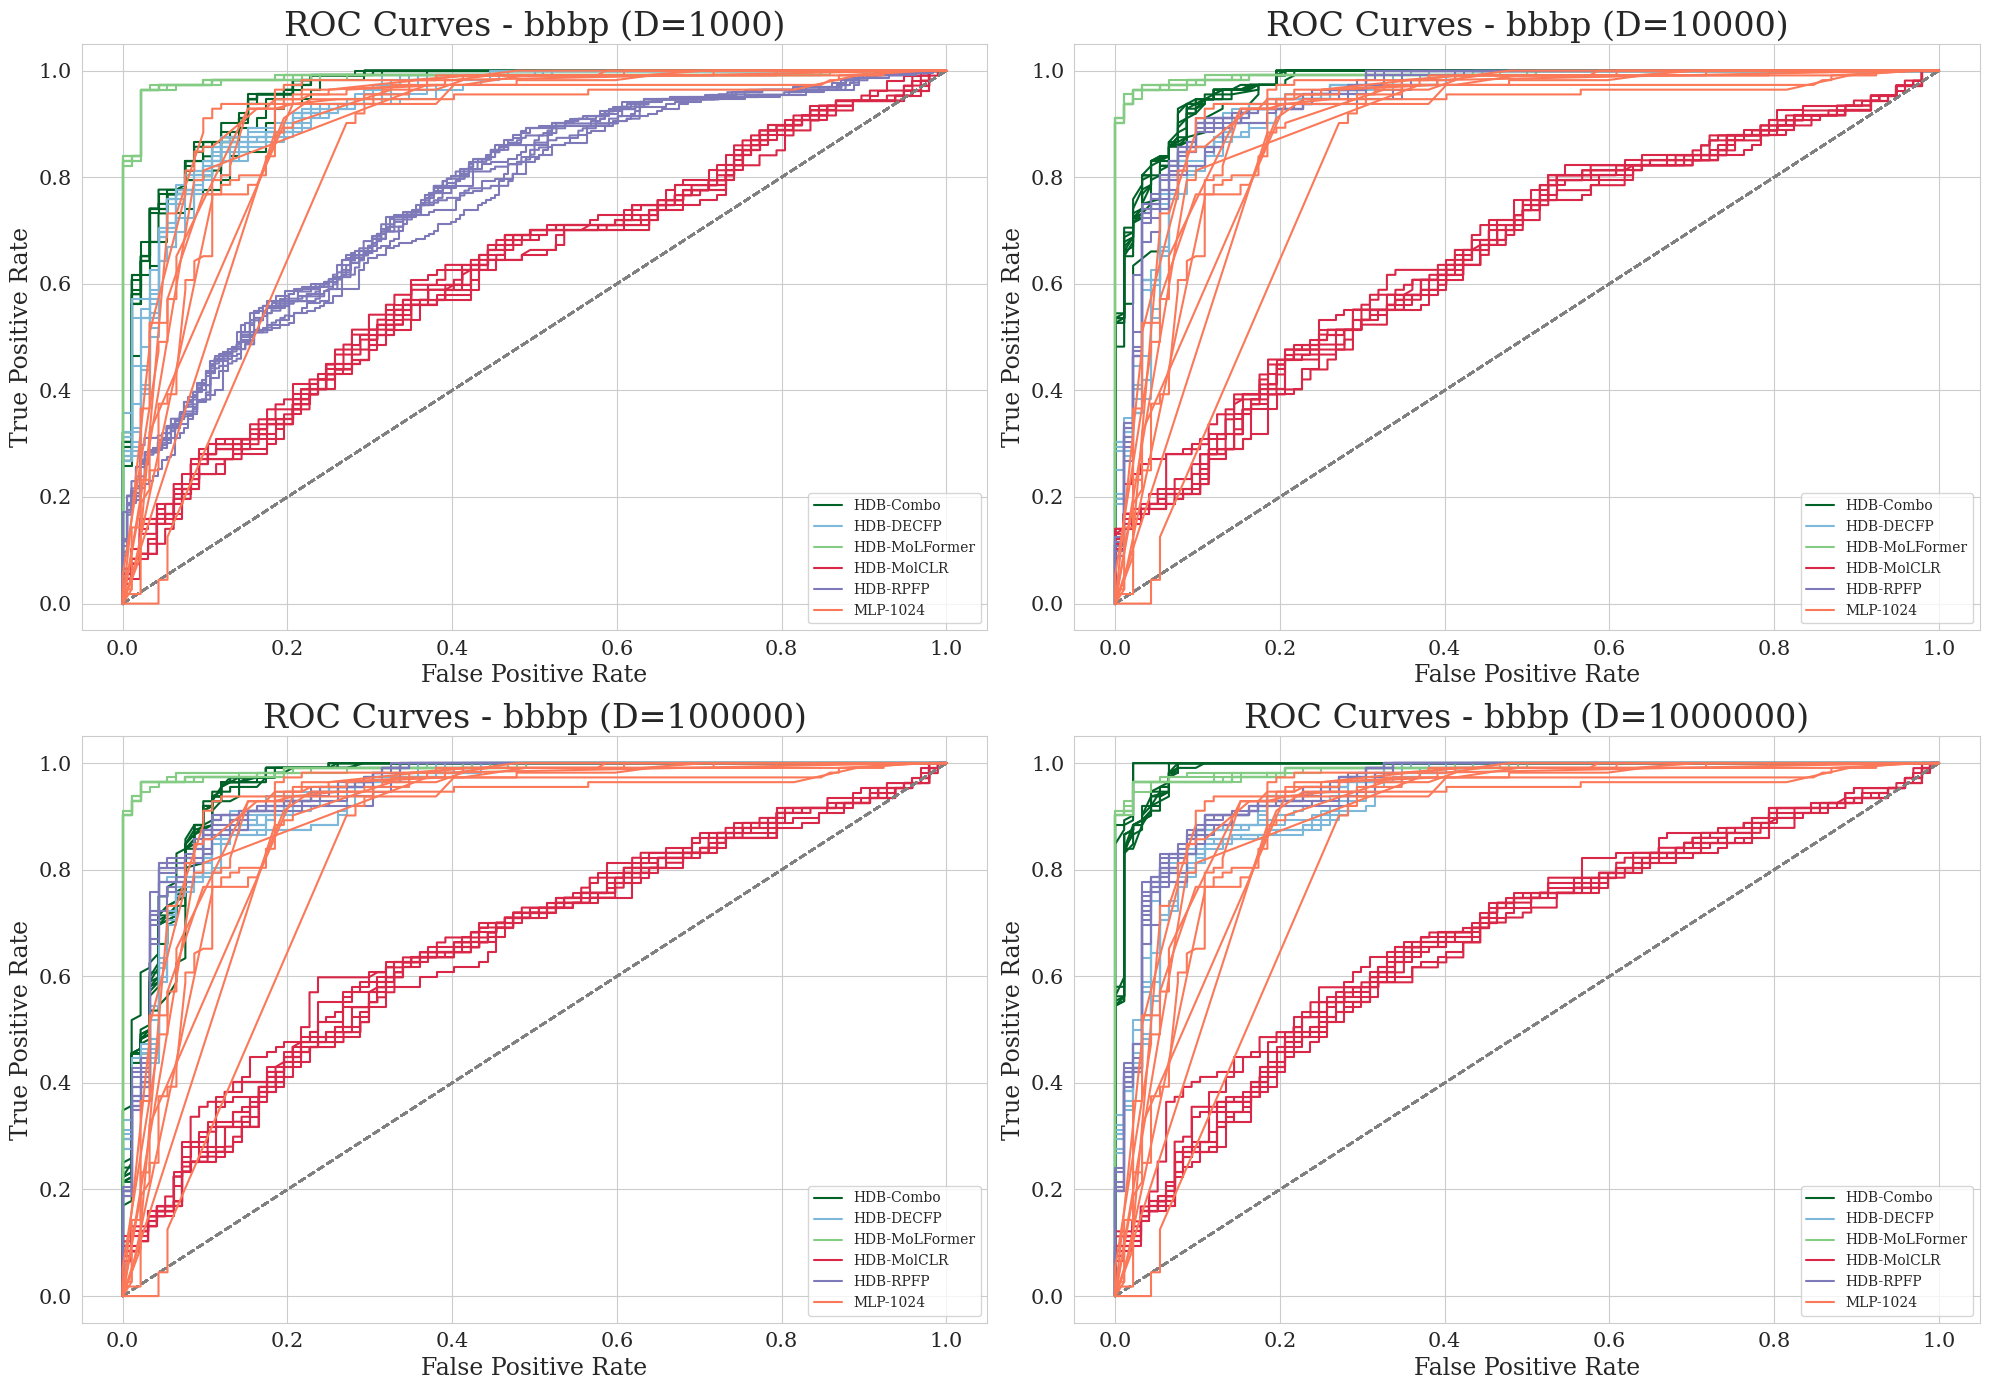

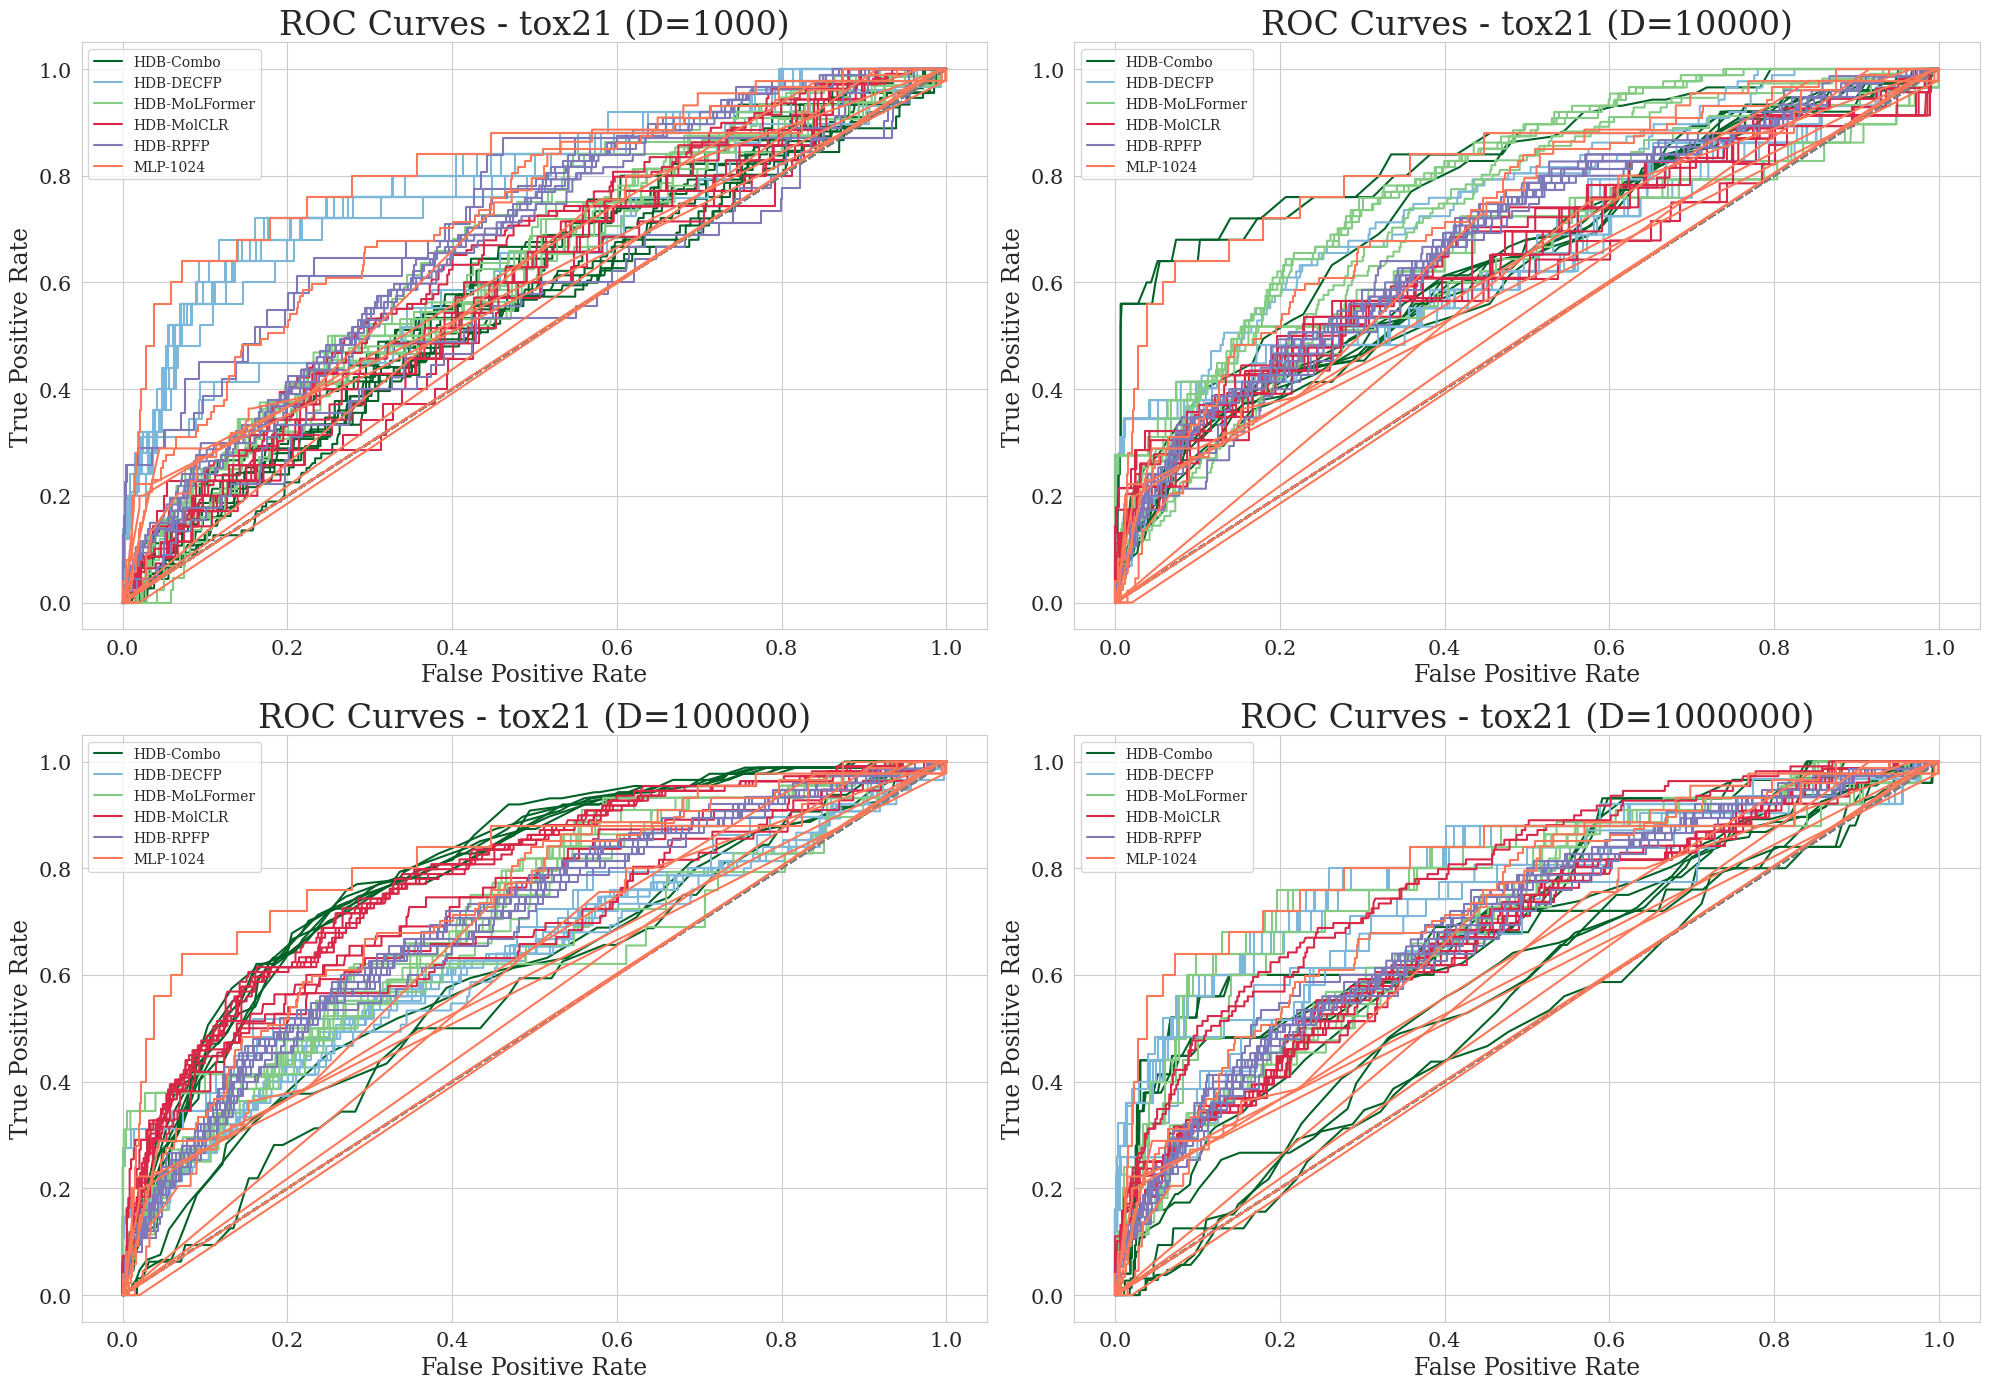

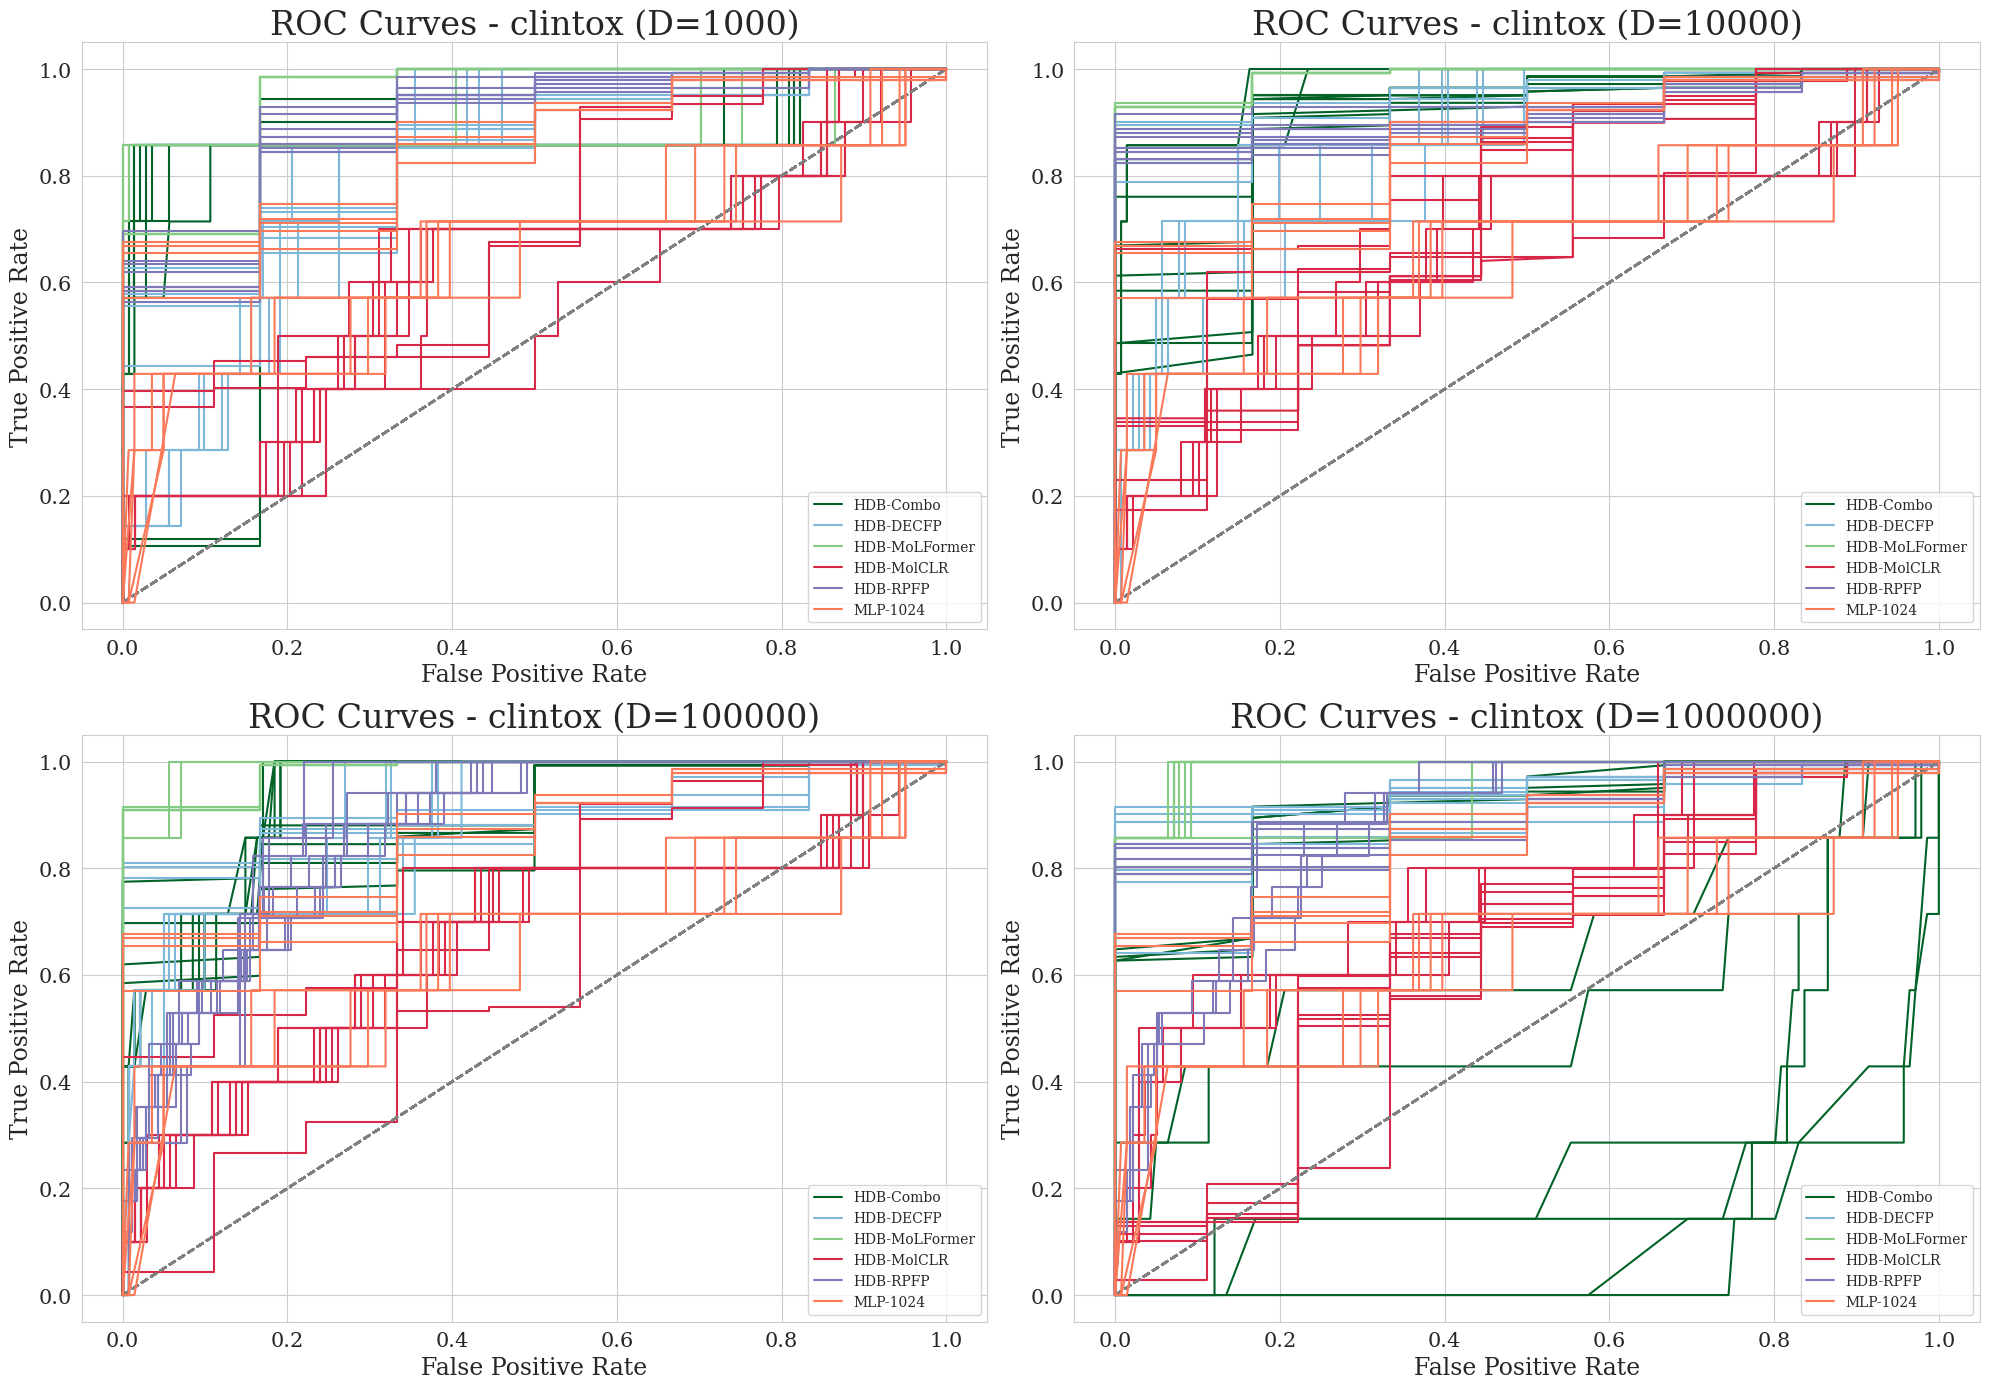

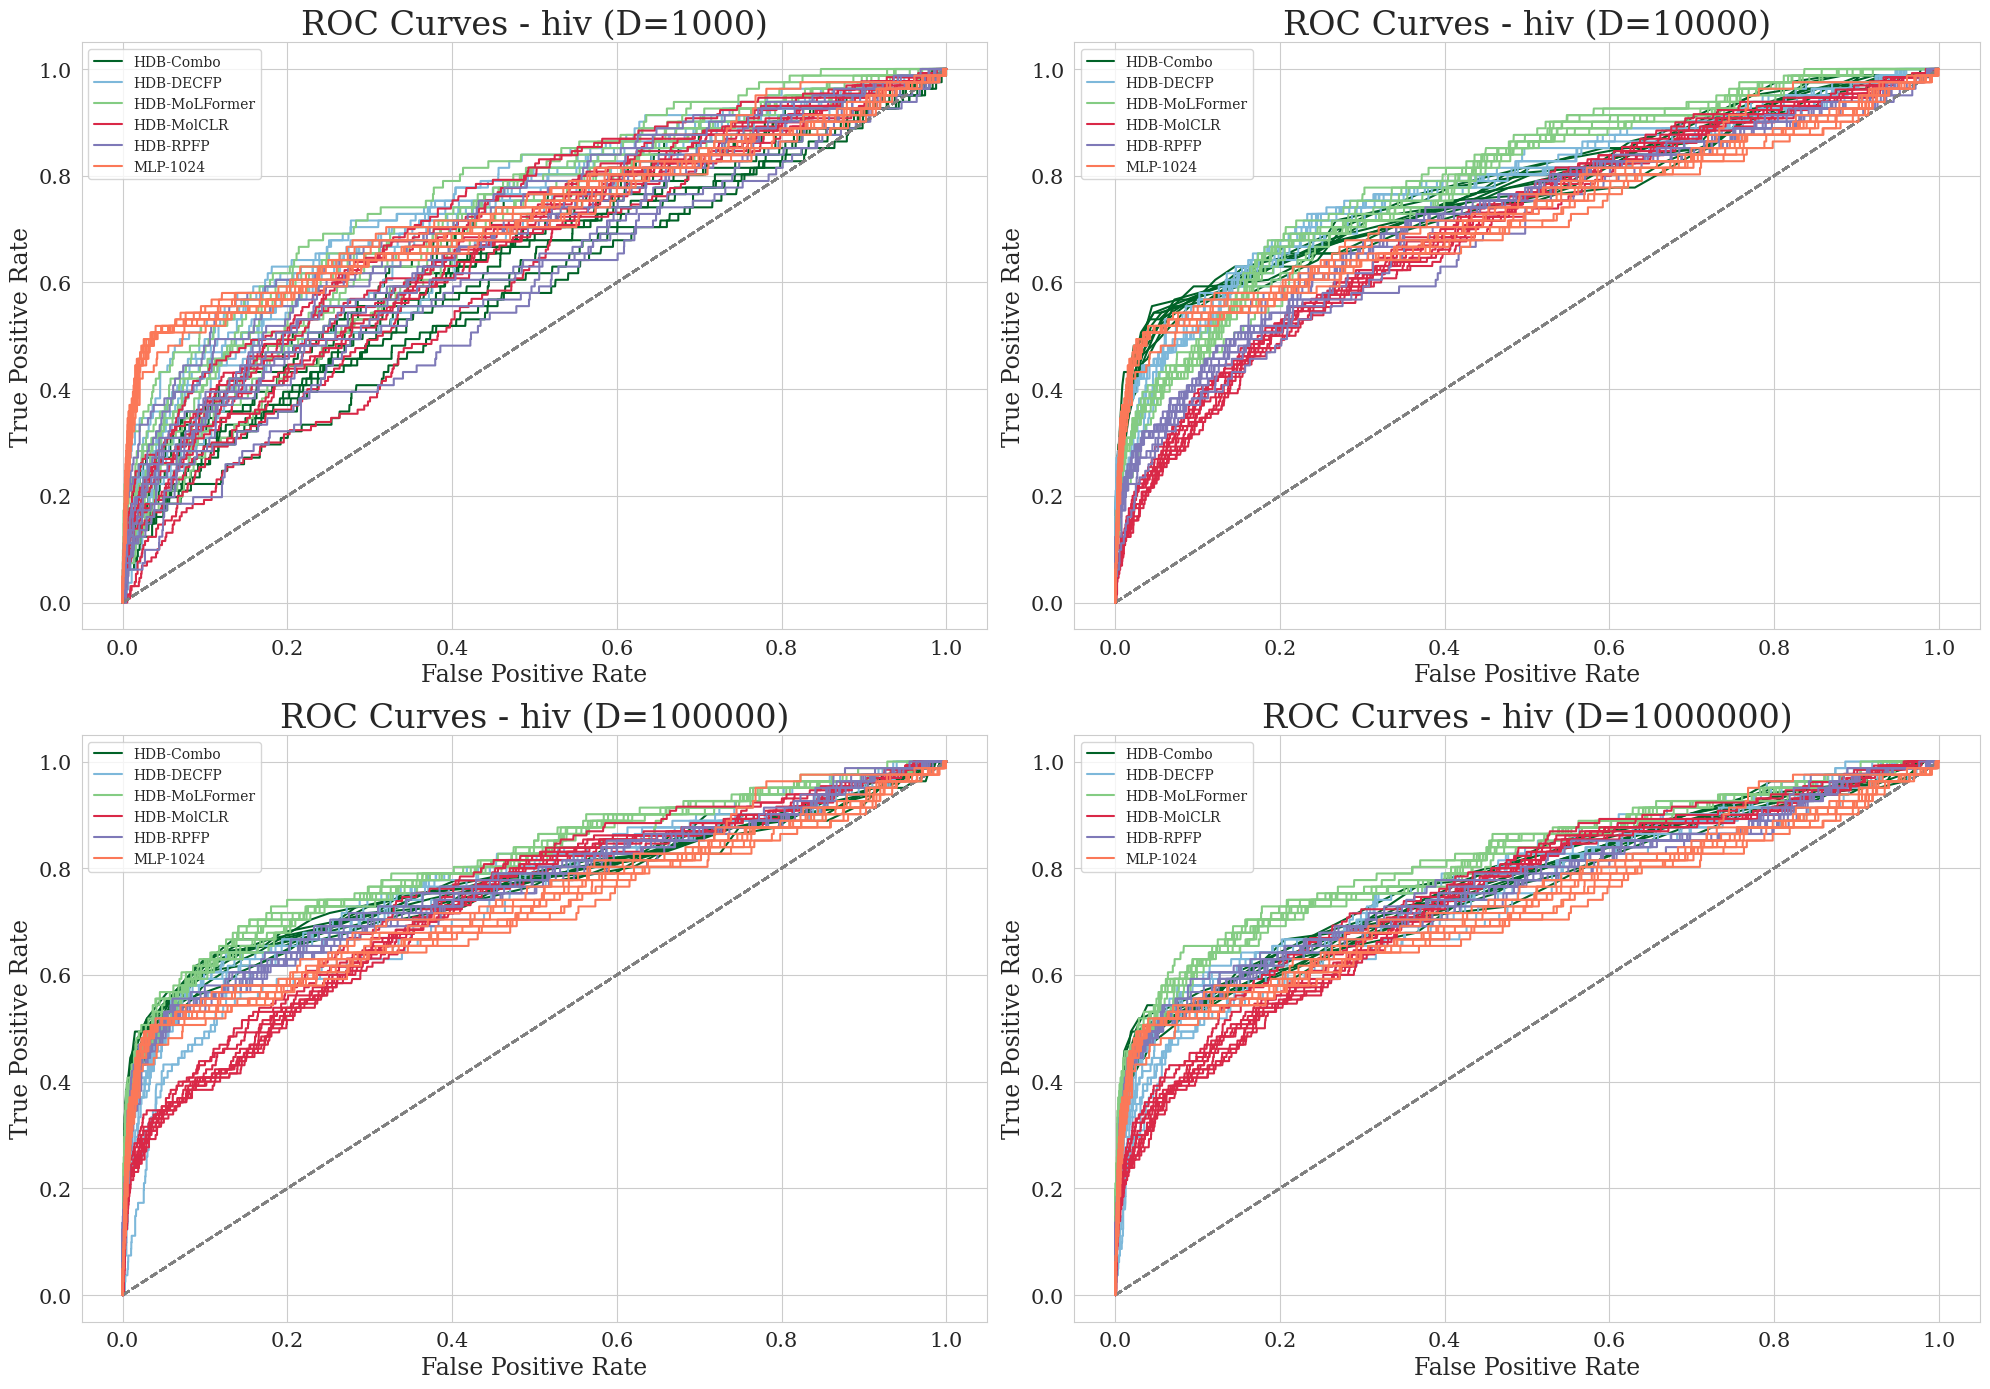

In [9]:

use_seaborn=False
# use_seaborn=True
config_dir = "configs"
# for dataset in ["bbbp", "tox21", "clintox", "hiv", "bace", "sider"]:
for dataset in ["bbbp"]:
    print(dataset)
    metric_df = get_metric_df(
                                dataset=dataset,
                                config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
                                split="scaffold", 
                                use_cache=False,
                                verbose=False,
                                use_time=False,
                                use_roc_curve=True)
    

    fig = make_roc_curve_plot(df=metric_df, title=f"ROC Curves - {dataset.lower()}", use_seaborn=use_seaborn)

    fig_path = Path(f"scirep_plot_backup/{dataset}-{RANDOM_SEED}-seaborn={use_seaborn}-roc-curve.png")
    if not fig_path.exists():
        fig_path.parent.mkdir(exist_ok=True, parents=True)

    fig.savefig(fig_path, dpi=450)


    # bbbp_metric_df

In [29]:

def ttest_main(metric="roc-auc"):

    for alpha in [0.05, .025, .01]:
        for method in ["bonferroni", "holm", "simes-hochberg"]:
            make_ttest_plot(metric=metric, mult_alpha=alpha, method=method)

# ttest_main(metric="roc-auc")
# ttest_main(metric="er-1")


0.8709950410113589 0.7355133392848257


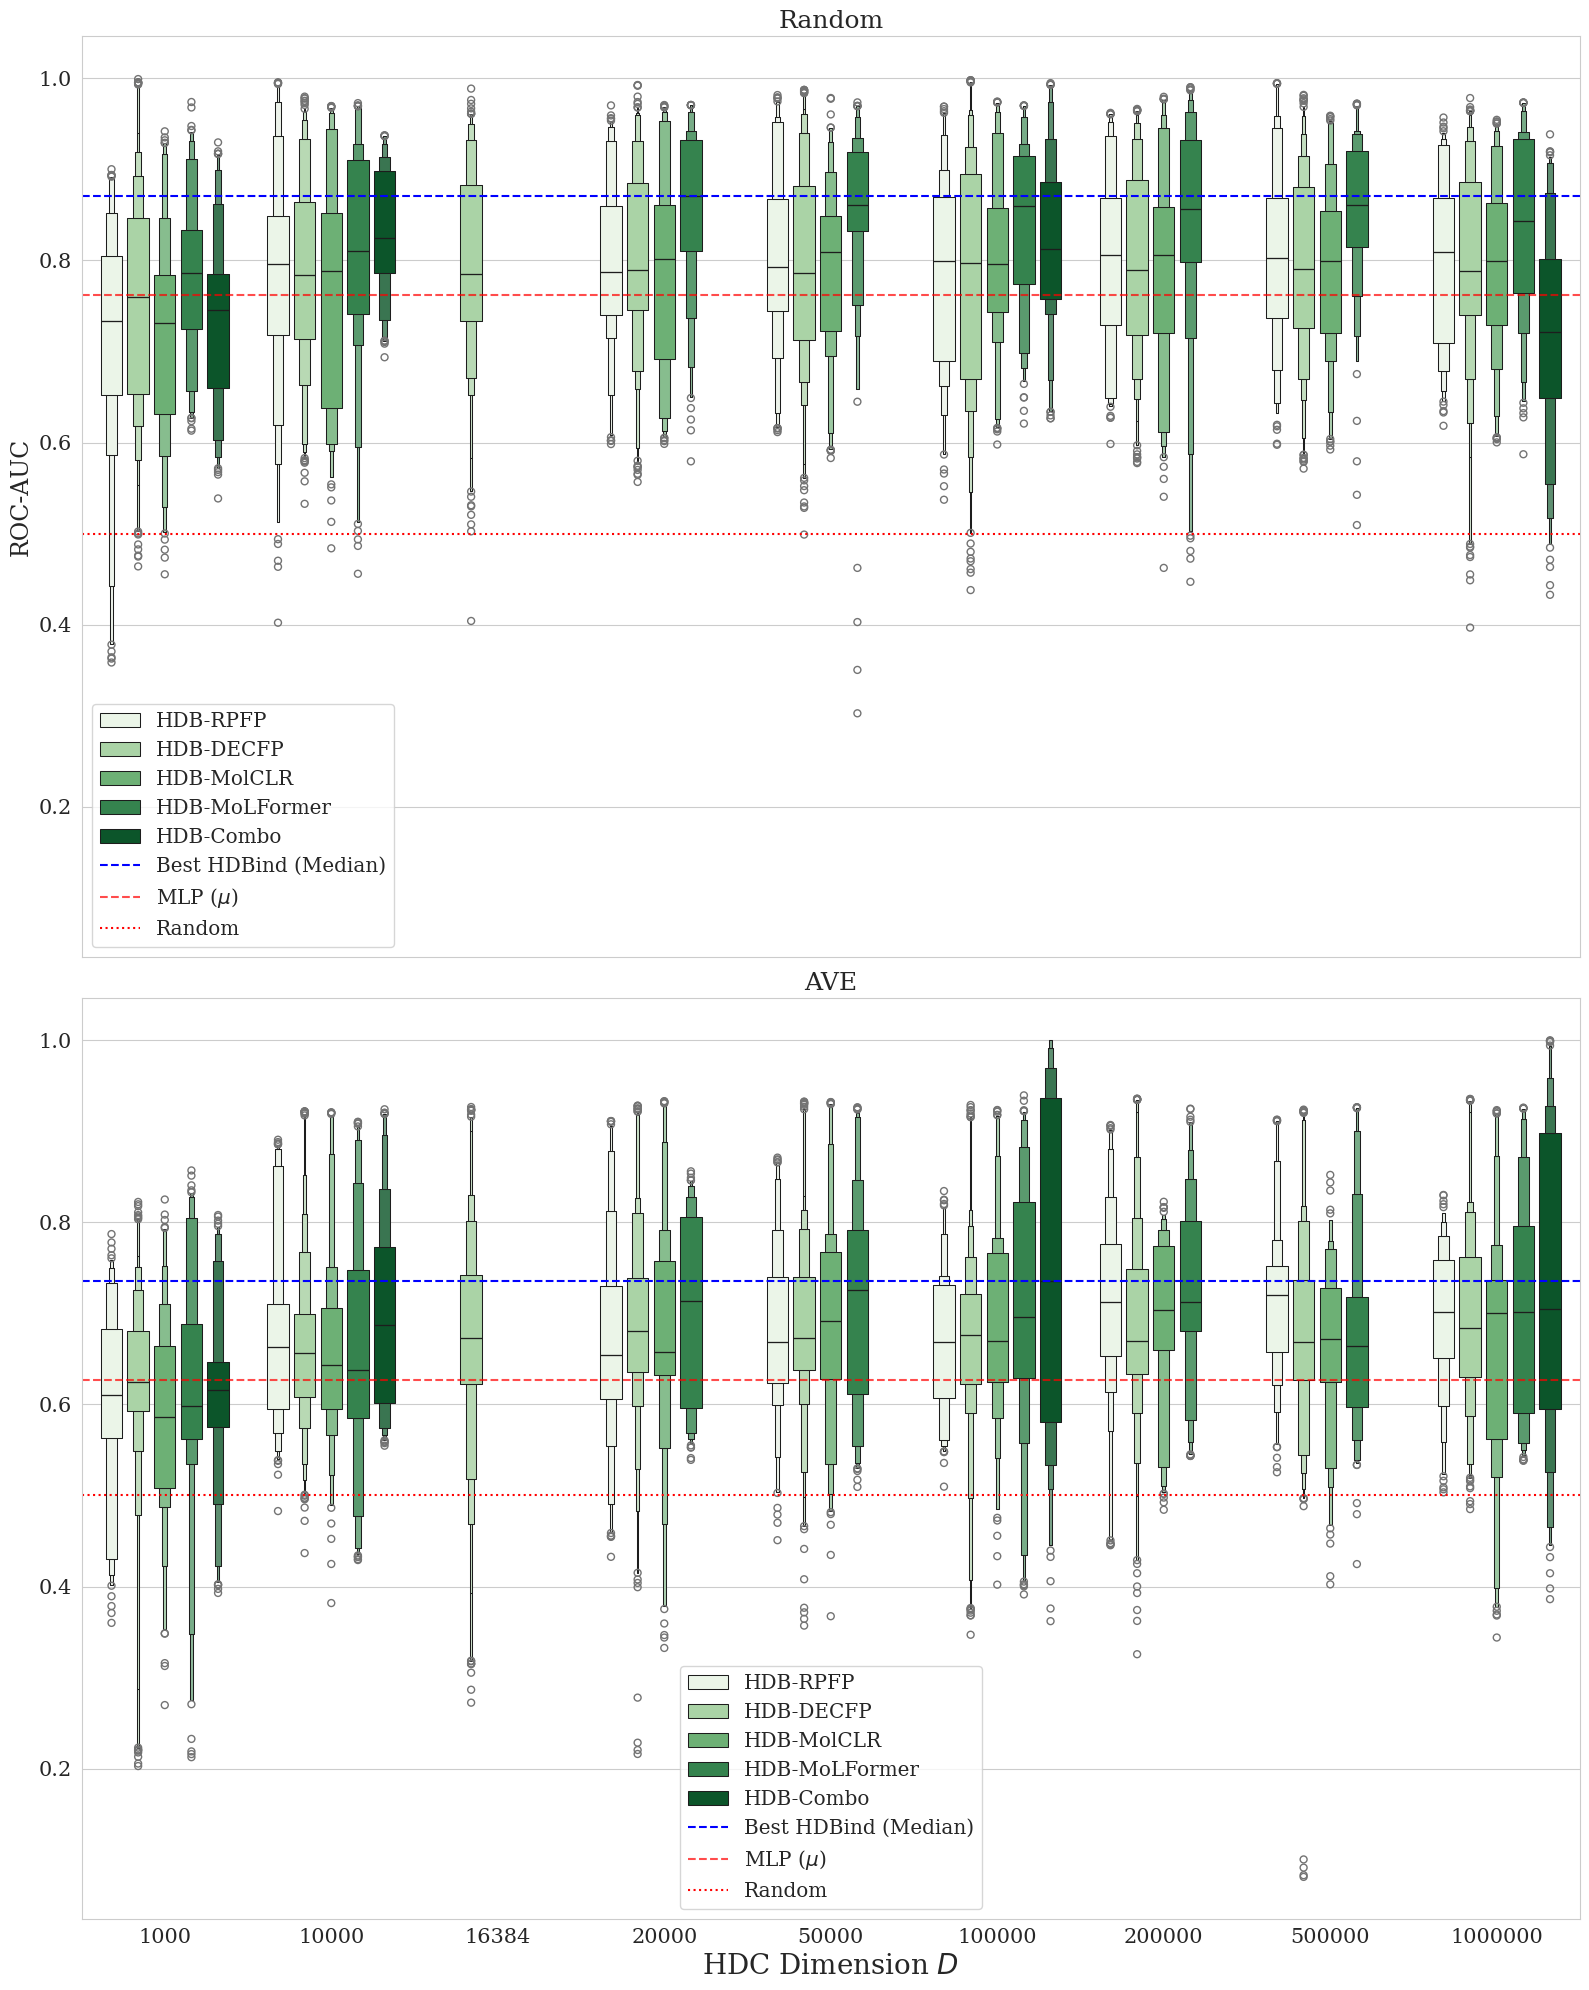

In [30]:
make_roc_auc_plot()

er-0.1
er-0.2
er-0.5
er-1.0
er-2.0
er-5.0


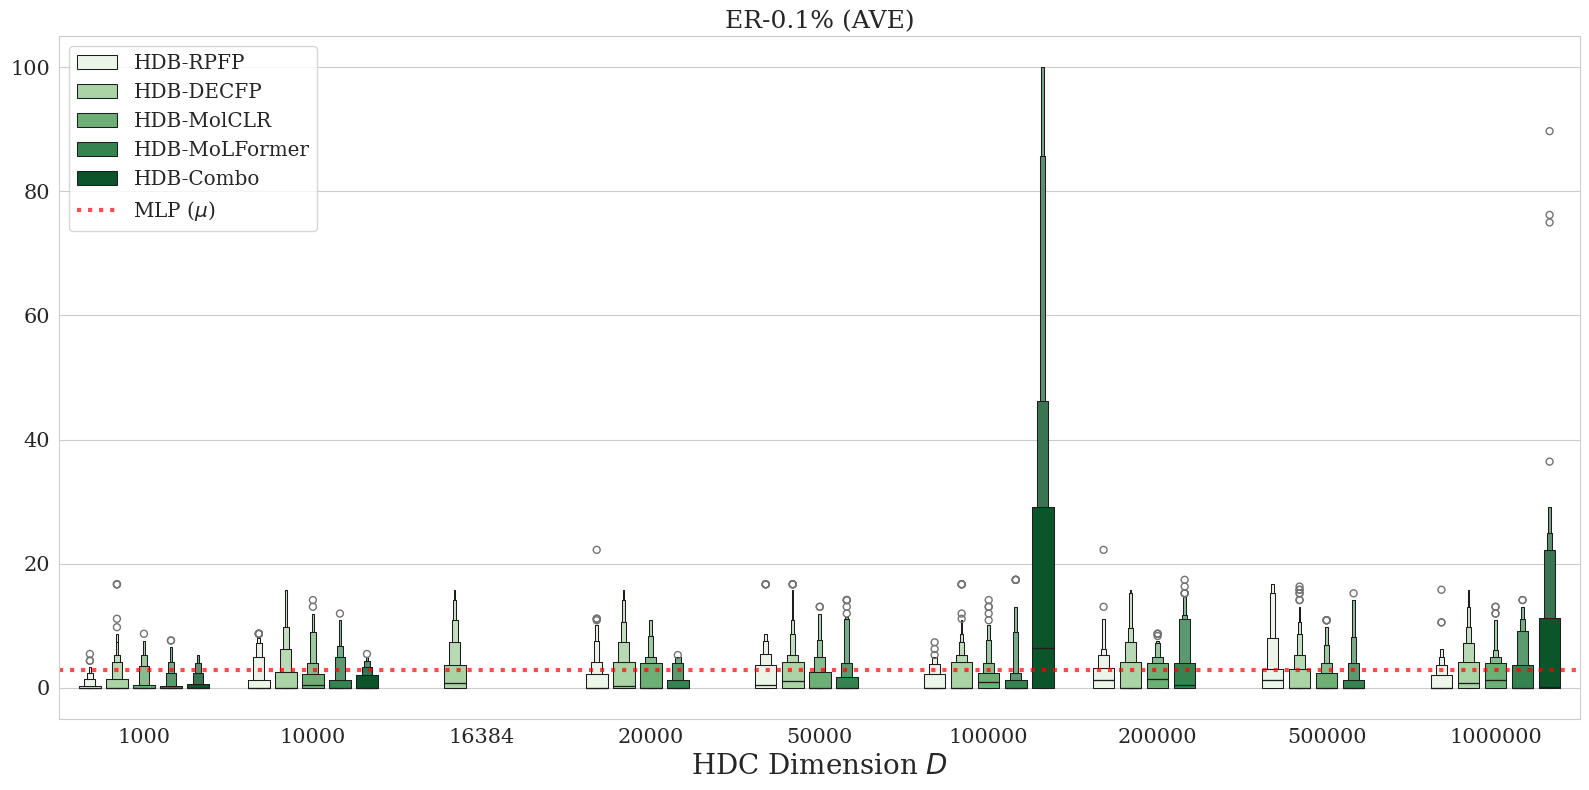

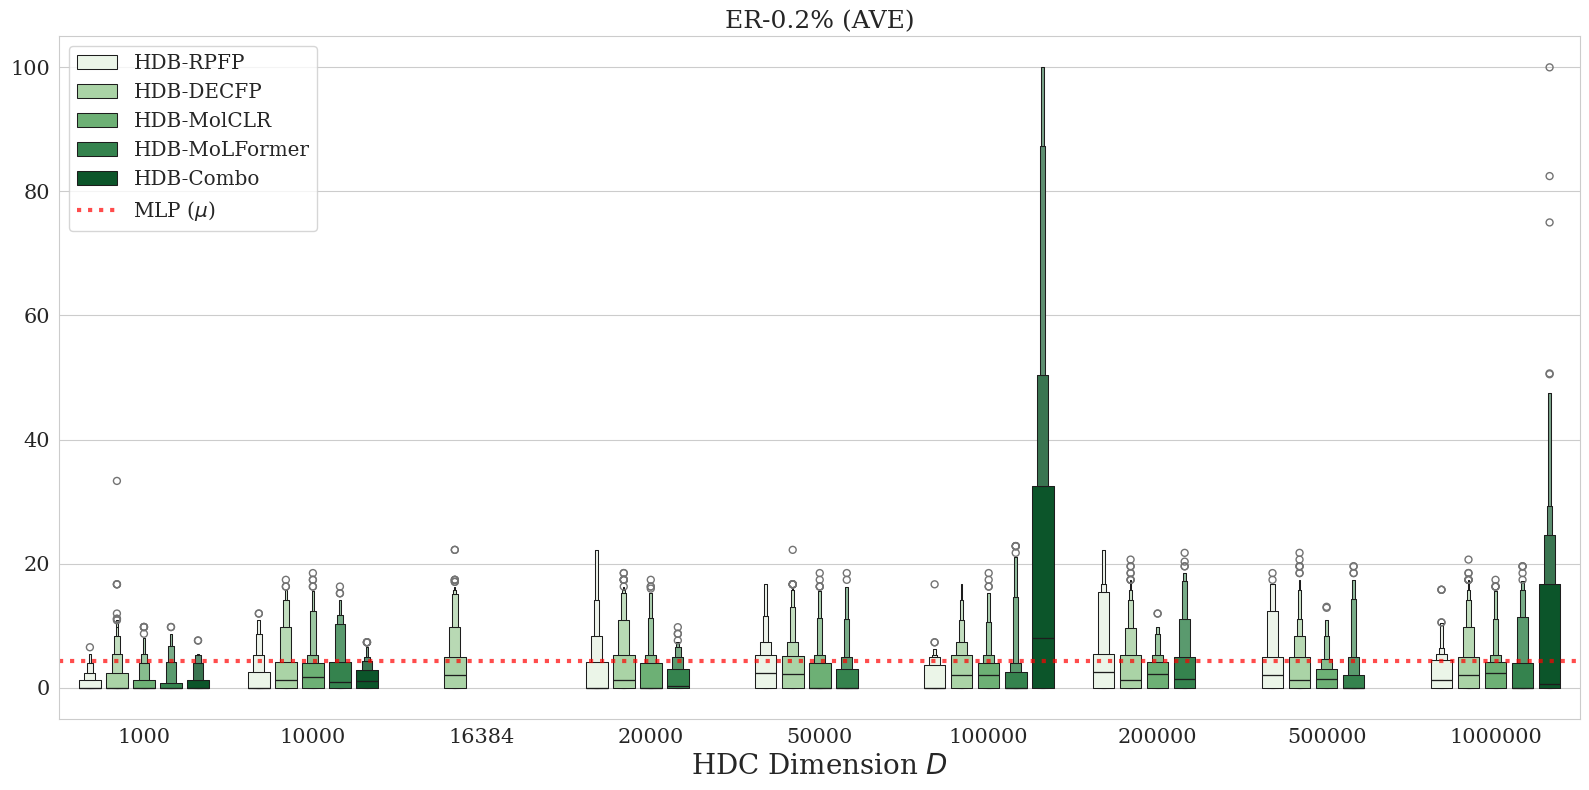

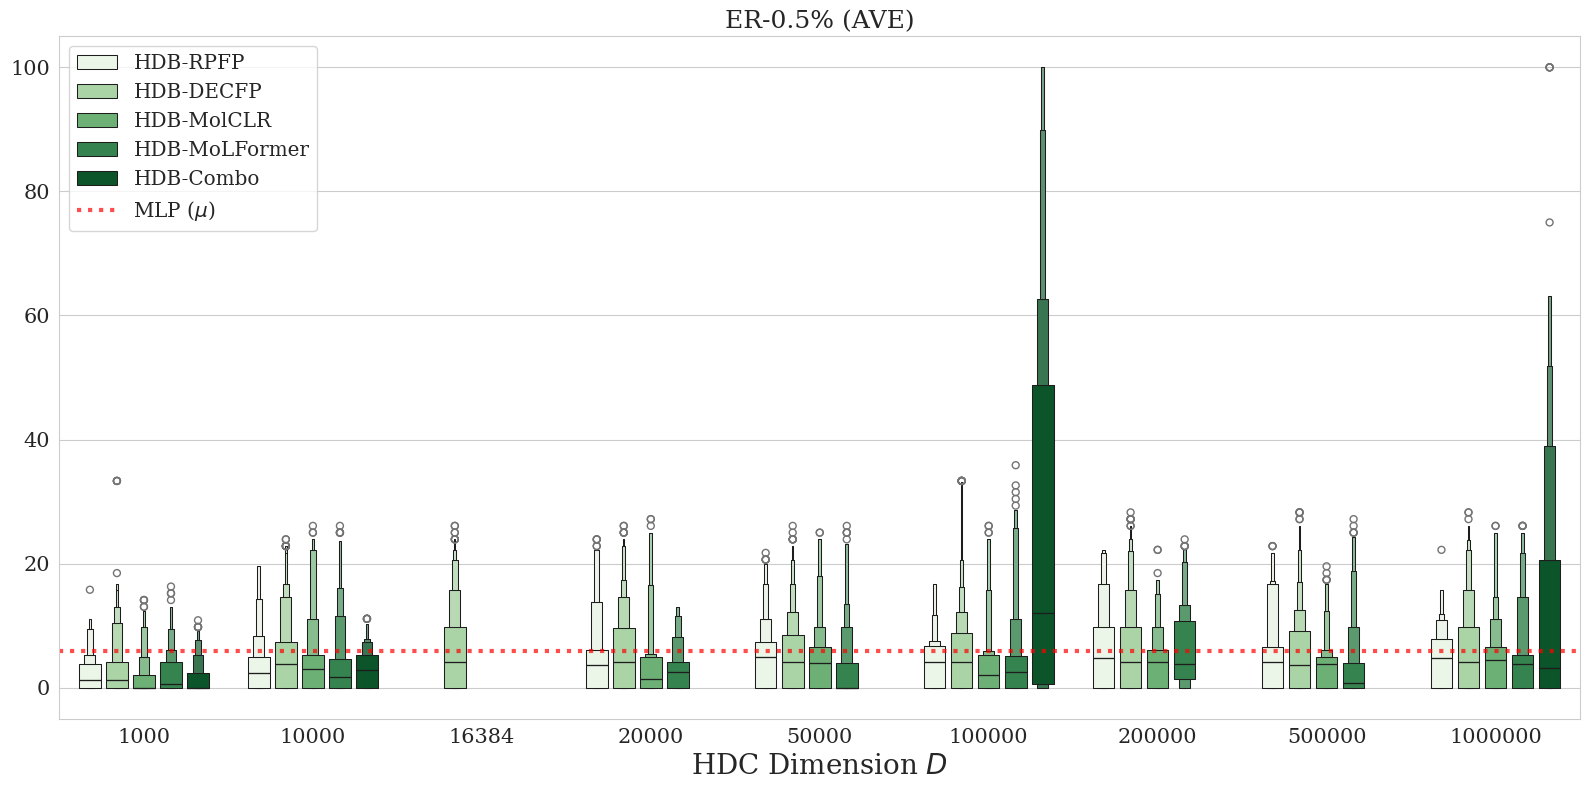

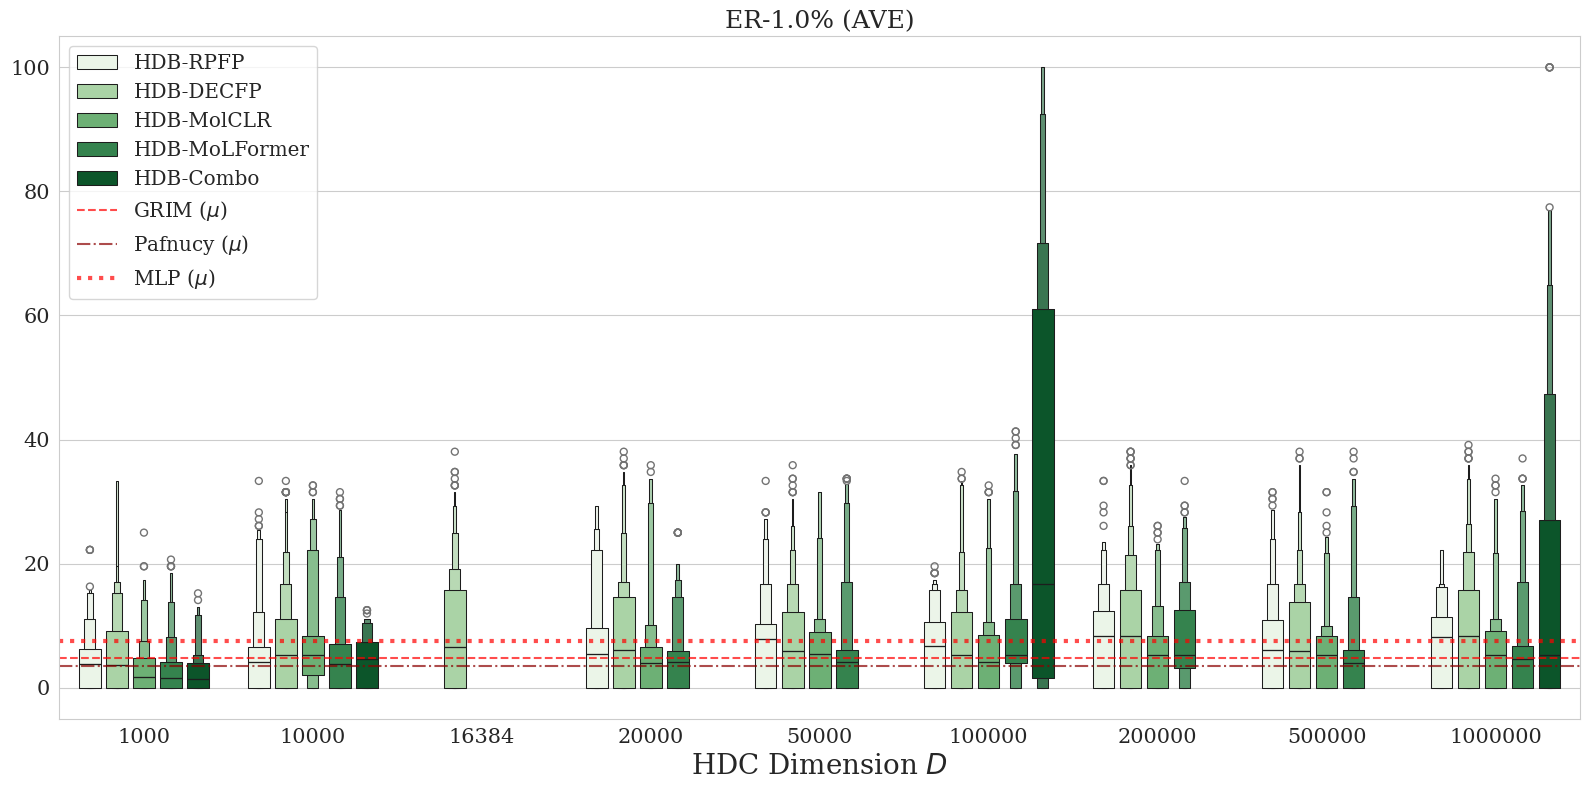

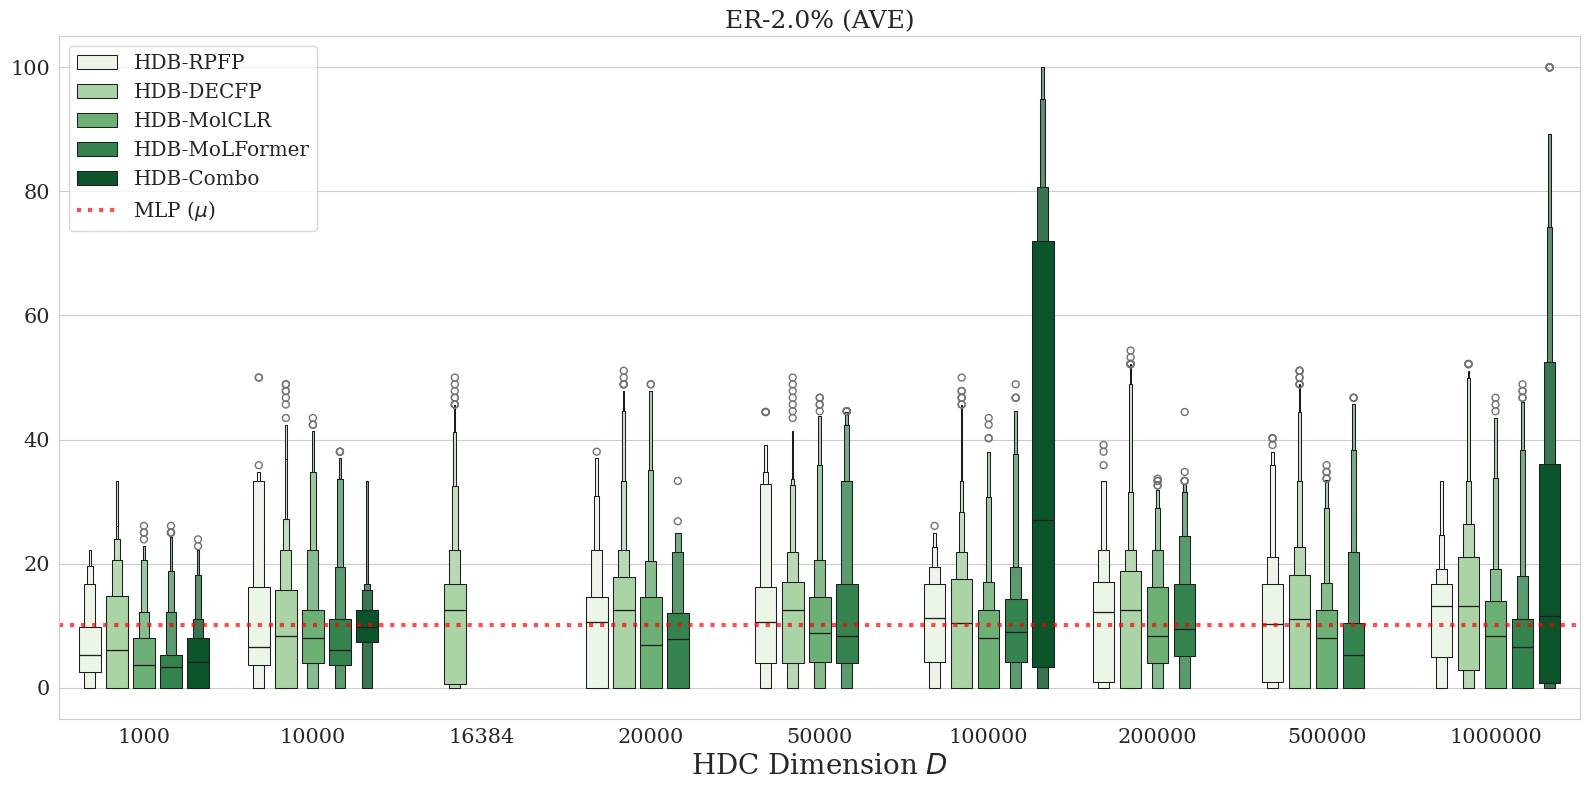

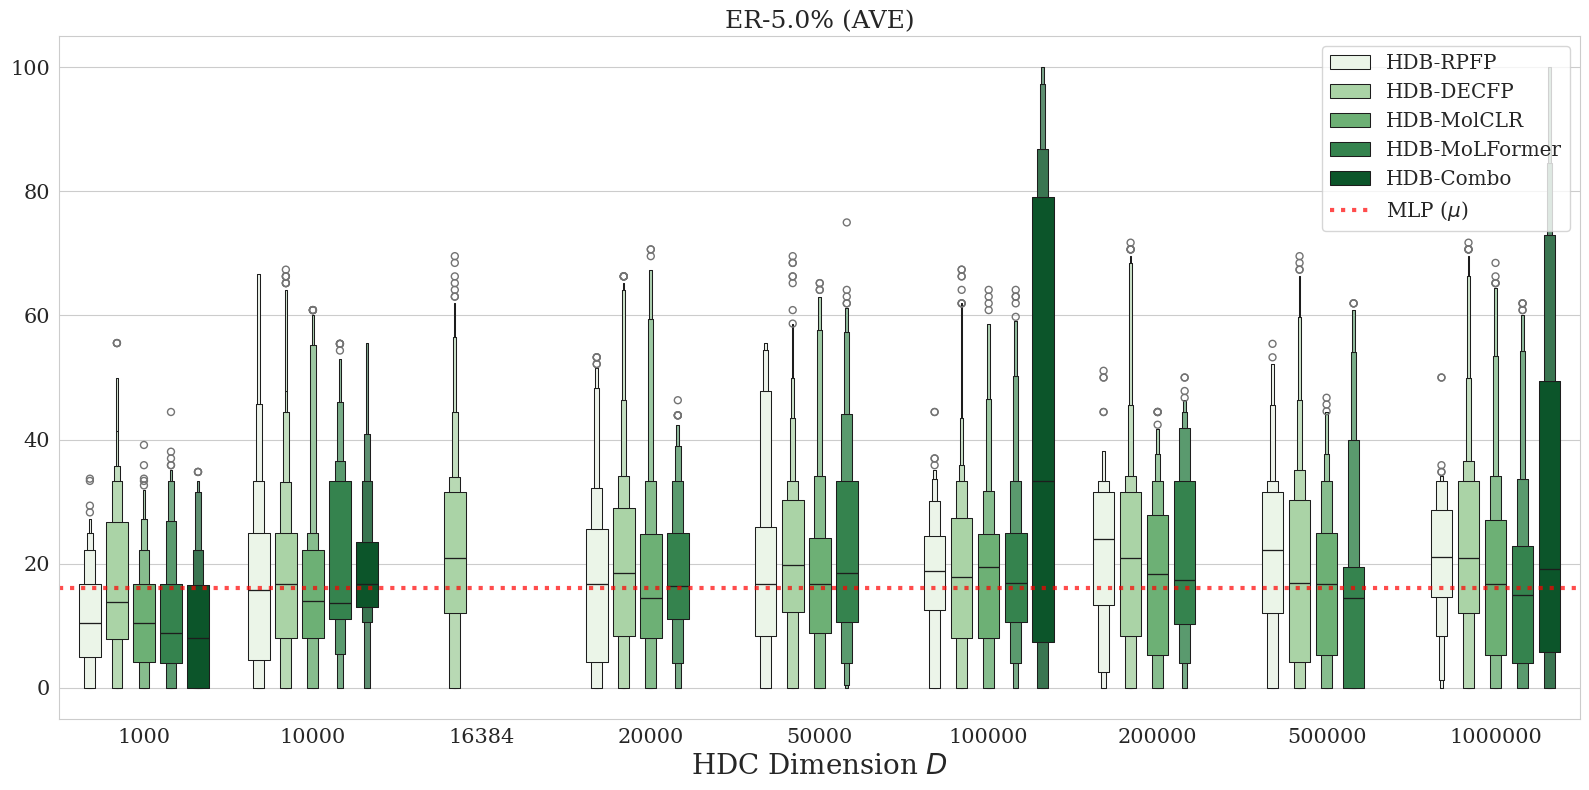

In [31]:
for thresh in [1/1000, 2/1000, 5/1000, 1/100, 2/100, 5/100]:
    make_er_plot(thresh=thresh)

In [ ]:
ave_metric_df['target'].unique()

In [ ]:
lit_pcba_summary_df = pd.read_csv("/g/g13/jones289/workspace/hd-cuda-master/notebooks/lit-pcba-dataset-overview.csv")
merge_df = pd.merge(ave_metric_df, lit_pcba_summary_df, left_on="target", right_on="Set")


# merge_df
# paper_df = merge_df[merge_df["D"] > 10000].groupby(["model", 'D', 'target']).describe()[['roc-auc', 'er-1']].round(2)
paper_df = merge_df[merge_df["D"] > 10000].groupby(["model", 'D', 'target']).describe().round(2)


mask_cols = [x for x in paper_df.columns if x[1] in ["mean", "std", "min", "max"]]
paper_df = paper_df.loc[:, mask_cols]
mask_cols = [x for x in paper_df.columns if x[0] in ["roc-auc", "er-1", "Actives"]]
paper_df = paper_df.loc[:, mask_cols]
# print(paper_df.columns)
mask_cols = [x for x in paper_df.columns if x[0] != "Actives" or x[0] == "Actives" and x[1] not in ["std", "min", "max"]]
paper_df = paper_df.loc[:, mask_cols]
# paper_df.to_csv("lit-pcba-by-target-metrics.csv")
paper_df.to_latex("lit-pcba-by-target-metrics.tex")
paper_df